# 신입세션 1주차 실습 코드

# 0. 도메인 살펴보기

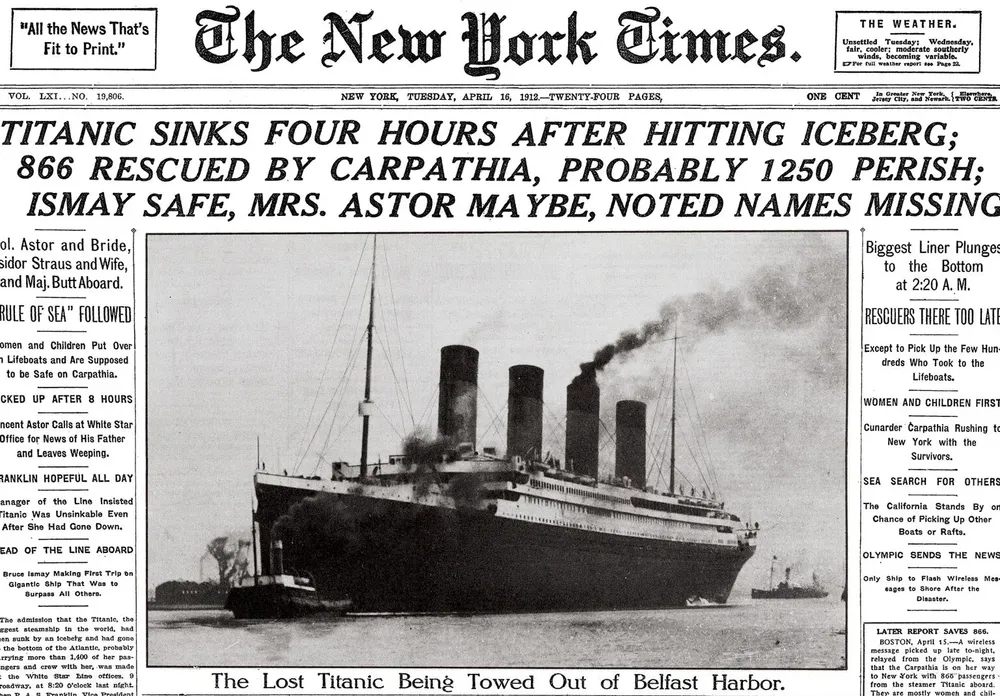

In [2]:
from IPython.display import Image 
Image("../타이타닉이미지.png")

### 1) 개요 
- 타이타닉은 1912년 4월 14일 RMS 타이타닉호가 북대서양에 침몰한 해상 사고
- 4월 14일 밤 11시40분경에 빙산과 충돌했다.
- 2시간 40분 만인 새벽 2시 20분에 침몰하여 2224명중 1500명이 사망 700명 생존

### 2) 당시 사회의 계층 구조
- 1900년대 초는 사회적으로 계층구조가 나뉘던 시기
- 당시 타이타닉 호는 1등실, 2등실, 3등실로 분리되던 구조
- 여성의 인권이 낮았던 시기로 '기사도' 정신이 성행하던 시기

### 3) 선박 구조
- 1등석은 선박의 상층부에 위치하여 공명보트와 가까운 이점을 갖고 있다.
- 2등석은 1등석 아래층에 위치하였다.
- 3등석은 선박의 하층부와 후미에 위치해 있다. 다인실 형태로 여러 명이 함께 사용하며
2층 침대가 주로 있는 방.

# 1. 가설 세우기

- 1등석의 생존률이 2,3등석에 비해 높을 것이다. 
- 여성과 아이의 생존률이 남성의 생존률보다 높을 것이다. 

- 따라서 객실등급, 성별, 나이 등이 많은 영향을 줄 것이다.

# 2. 라이브러리 불러오기

pandas : 데이터 분석 라이브러리  
numpy : 다양한 계산과 분석 라이브러리  
matplotlib : 시각화 도구 제공  
seaborn : 더 정돈된 시각화 도구

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # train - test split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 3. 데이터 불러오기

### titanic 데이터 소개
- PassengerId : id 
- Survived : 생존 여부 (0:사망, 1:생존)
- Pclass : 티켓클래스 (1:1등석, 2:2등석, 3:3등석)
- Name : 승객 이름
- Sex : 성별
- Age : 나이
- Sibsp : 형제 자매 수
- Parch : 부모 자식 수
- Ticket : 티켓 넘버
- Fare : 티켓 요금
- Cabin : 선실
- Embarked : 승선한 항

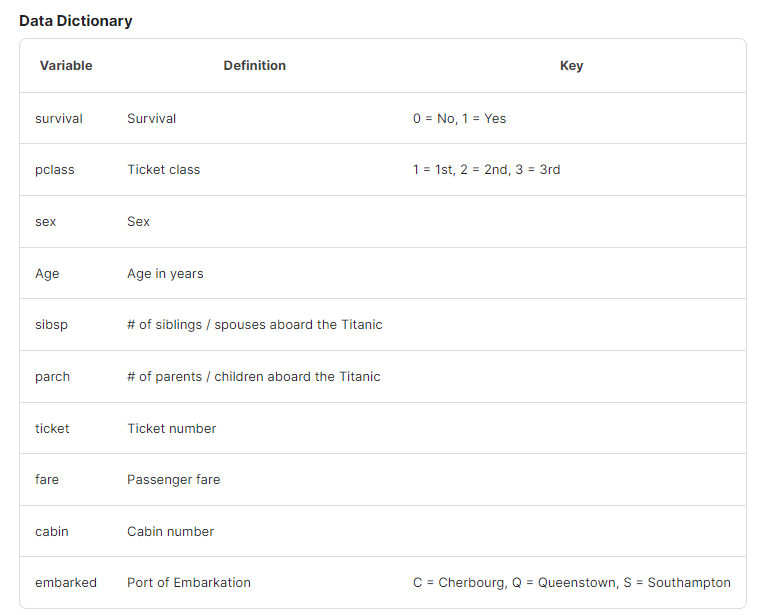

In [4]:
Image("C:/Users/wandong/OneDrive/바탕 화면/타이타닉 데이터설명.png")

In [5]:
# 현재 폴더의 위치를 확인
%pwd

'C:\\Users\\wandong\\OneDrive\\바탕 화면\\신입세션 1주차\\code'

In [6]:
import pandas as pd
# 절대 경로를 이용한 데이터 불러오기
data = pd.read_csv('C:/Users/wandong/OneDrive/바탕 화면/신입세션 1주차/data/Titanic-Dataset.csv')
# 상대경로를 이용한 데이터 불러오기
data = pd.read_csv('../data/Titanic-Dataset.csv')

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 4. EDA
### 목적  
- 데이터의 개형 살펴보기 
- 간단한 인사이트 얻기
- 전처리를 위한 준비



### 4-1 데이터 살펴보기

In [8]:
data.head() #앞에 5개 행 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.tail() #뒤에 5개 행 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
data.info() #결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe() #기술통계량 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4-2 결측치 및 중복 데이터 확인

In [12]:
data.isna().sum(axis=0).sort_values() #결측치 개수 오름차순 정렬

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

In [30]:
# 나이가 결측인 값들 확인해보기
data[data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [31]:
# Cabin이 결측인 값 확인해보기
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [32]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data[data.duplicated()] #중복행 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Text(0.5, 1.0, 'correlation heatmap')

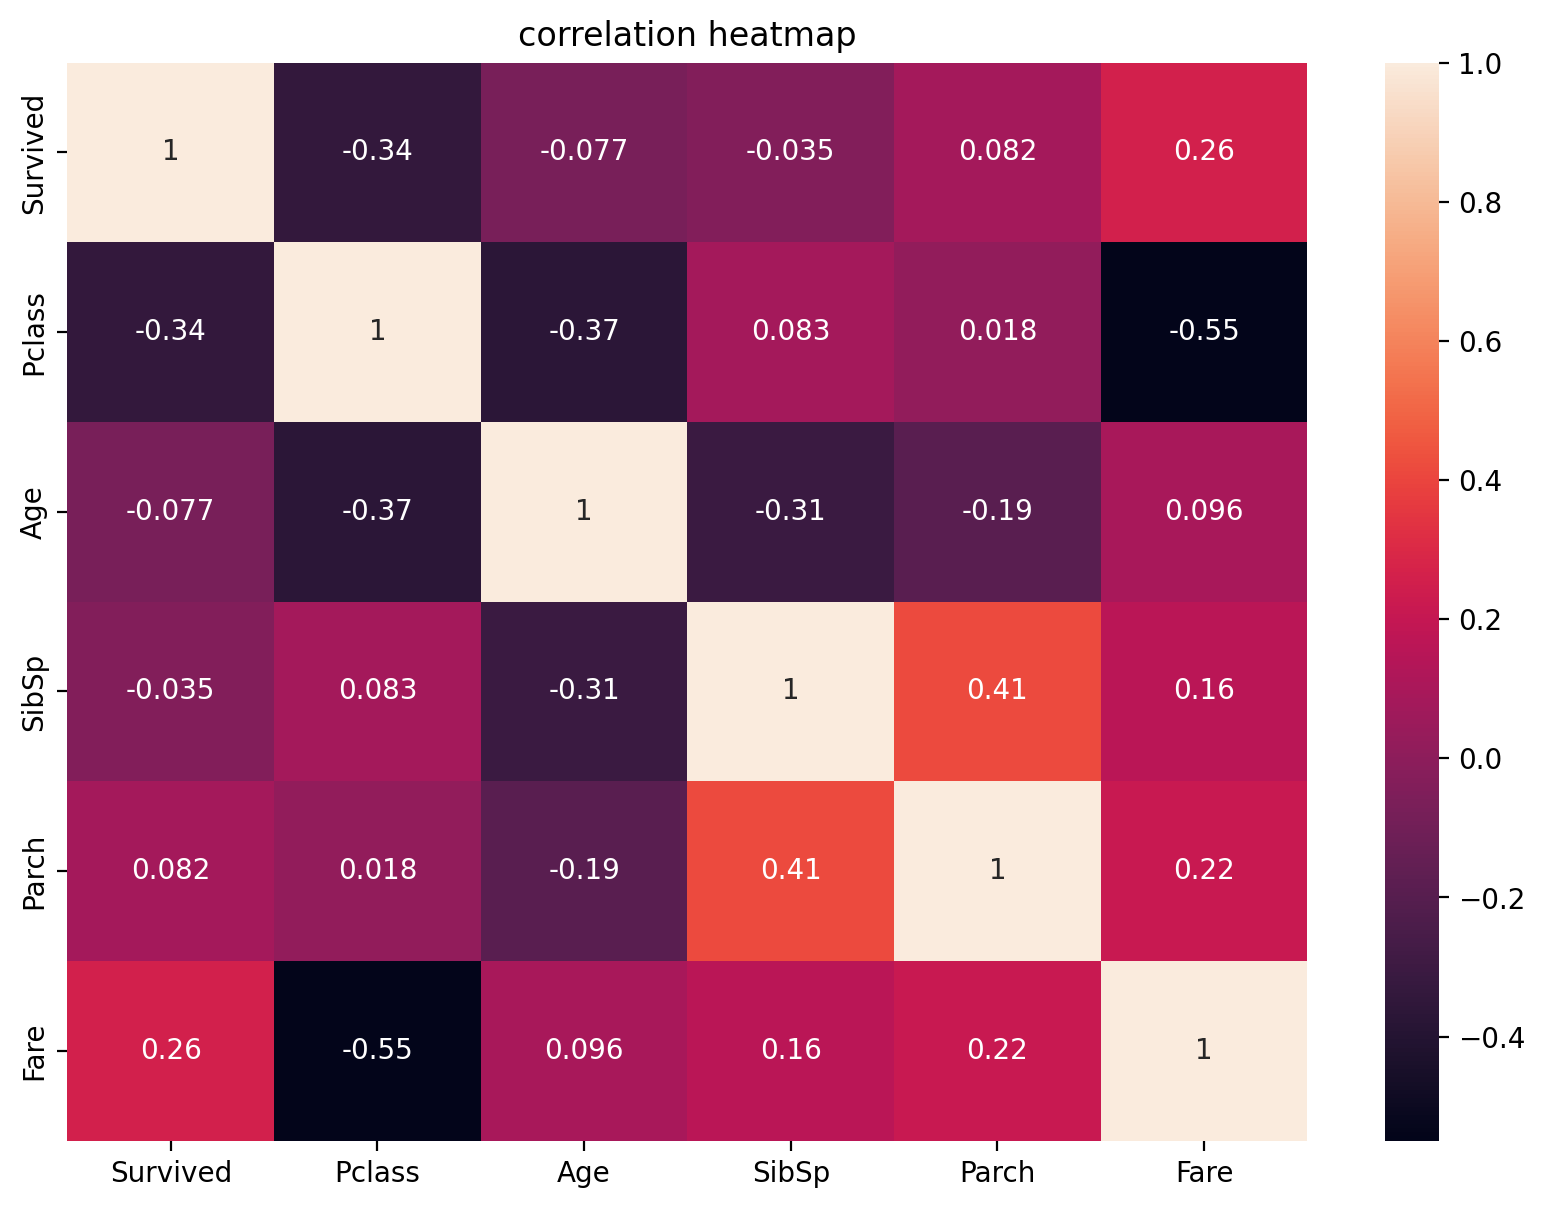

In [15]:
#data[['Survived','Pclass','Age','SibSp','Parch','Fare']]
plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),annot=True) #annot는 값  표기
plt.title('correlation heatmap') #상관계수 행렬 히트맵

In [16]:
# 데이터의 여러행 추출
data[['Survived','Pclass','Age','SibSp','Parch','Fare']]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [17]:
data.corr()

C:\Users\wandong\AppData\Local\Temp\ipykernel_16588\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### 4-3 종속변수 Survived 확인하기
- 0 : 사망, 1 : 생존
- 약 5:3의 비율을 가지고 있다

In [18]:
data['Survived'].value_counts() # 종속변수(Survived) 확인 (0:death, 1:survival)

0    549
1    342
Name: Survived, dtype: int64

In [19]:
data['Survived'].value_counts().values

array([549, 342], dtype=int64)

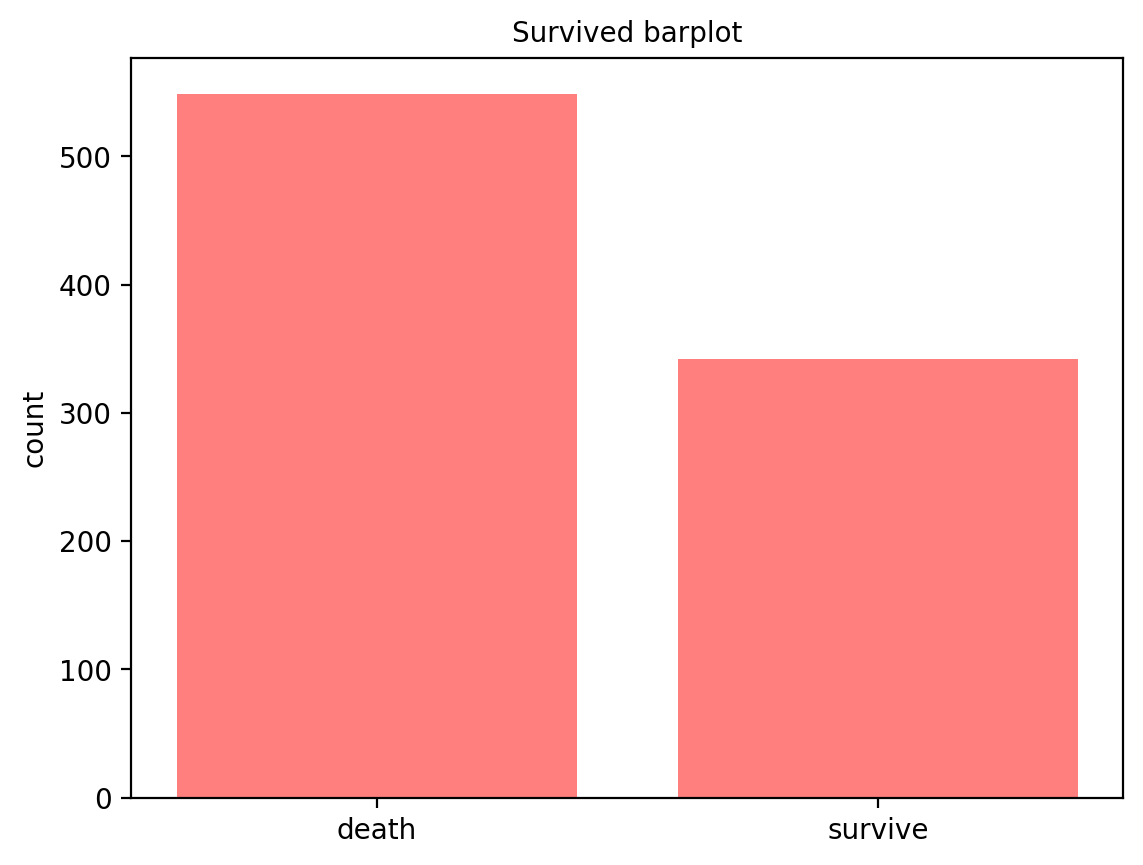

Text(0.5, 1.0, 'Survived barplot')

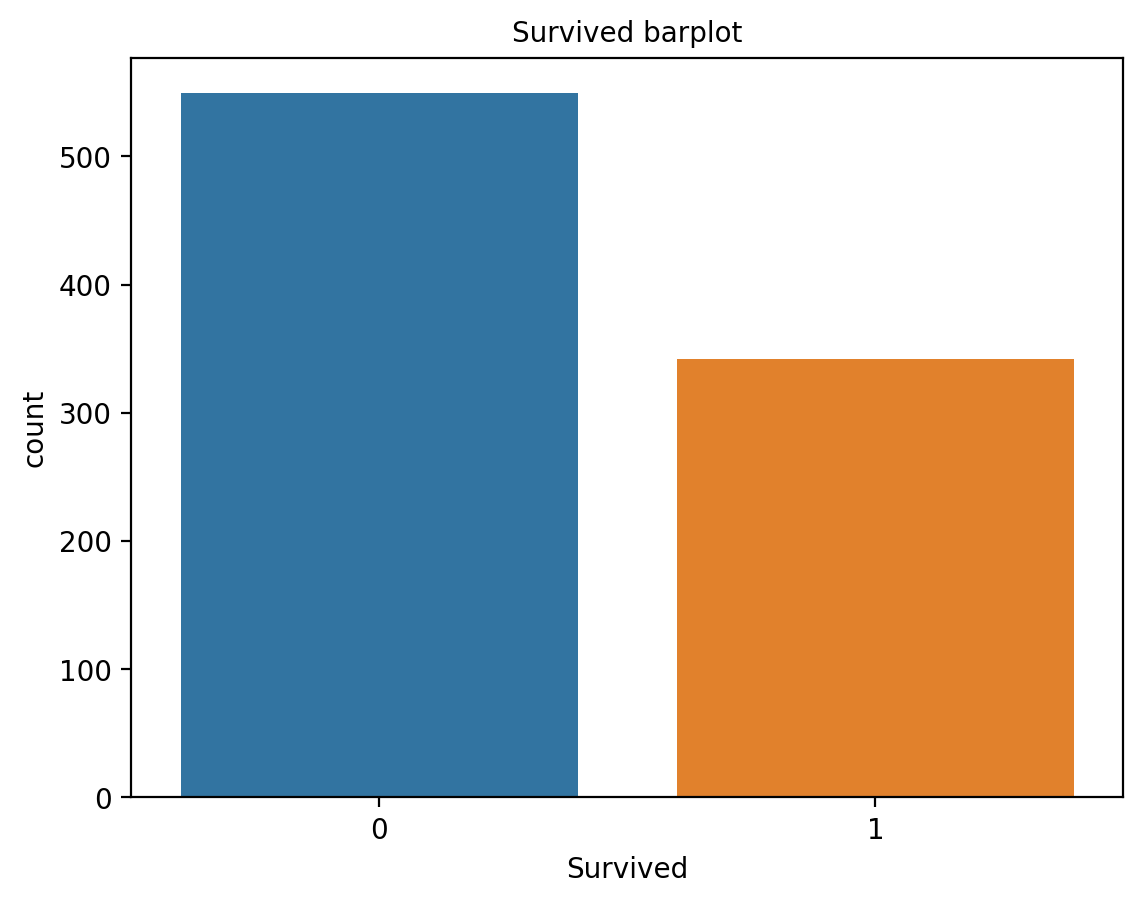

In [20]:
#plt 라이브러리
plt.bar(['death','survive'],data['Survived'].value_counts().values,color='red',alpha=0.5)
plt.title('Survived barplot',fontsize=10)
plt.ylabel('count')
plt.show()
#sns 라이브러리
sns.countplot(x='Survived',data=data)
plt.title('Survived barplot',fontsize=10)

### 4-4 Pclass(티켓클래스)
- 1,2,3까지 있음(1,2,3등석을 의미)
- 3등급 탑승객이 다른 등급보다 2배 정도 많음
- 티켓클래스가 낮을수록(높은 등급일수록) 생존 확률 증가
- 티켓클래스가 낮을수록 더 비싸짐 (1등석이 3등석보다 비쌈)

3    491
1    216
2    184
Name: Pclass, dtype: int64


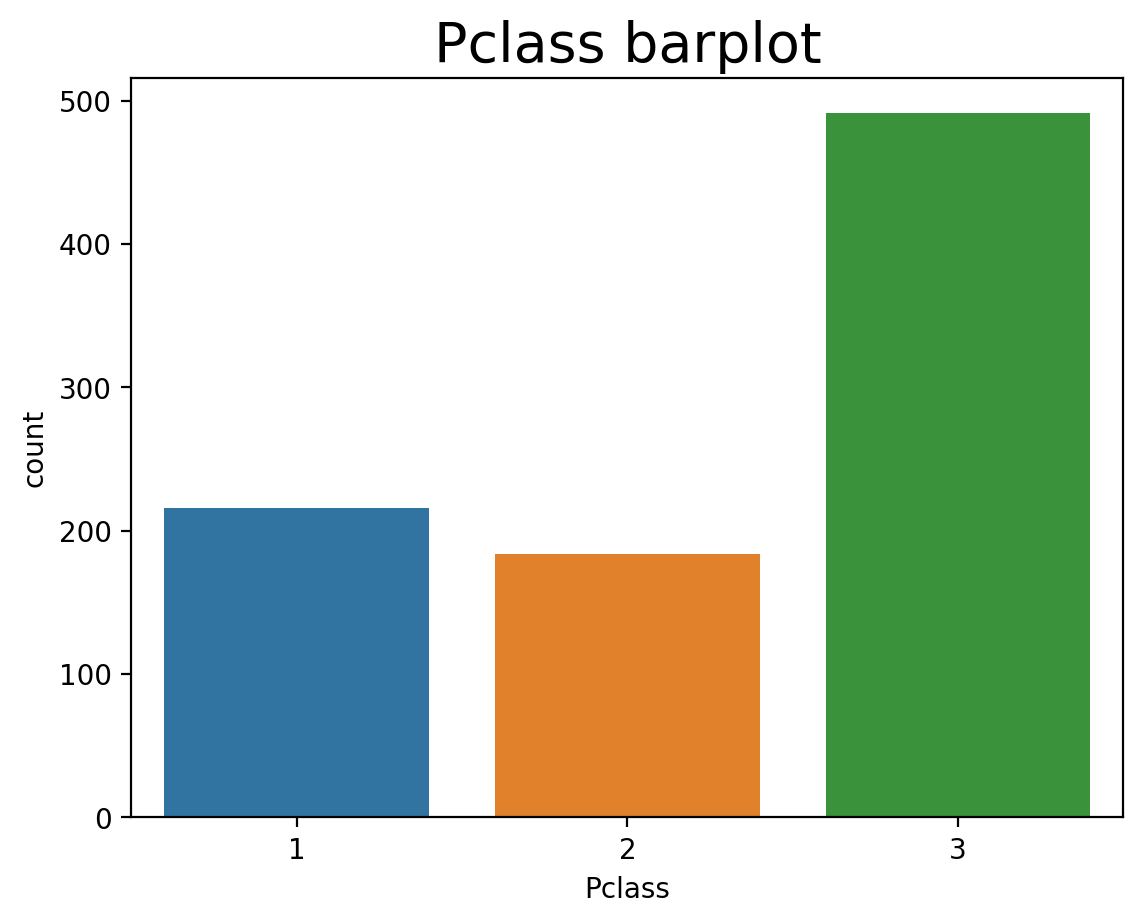

<Axes: xlabel='Pclass', ylabel='Fare'>

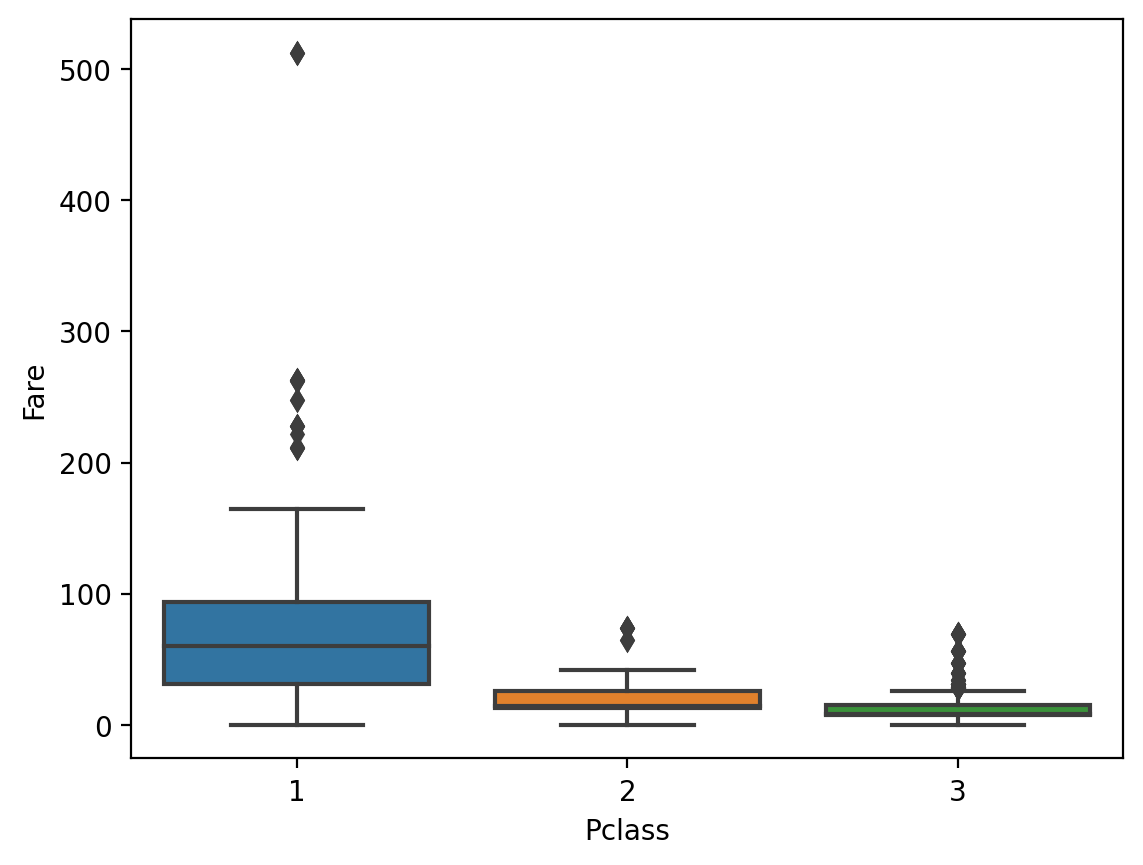

In [22]:
#Pclass
print(data['Pclass'].value_counts())
#시각화
sns.countplot(x='Pclass',data=data)
plt.title('Pclass barplot',fontsize=20)
plt.show()

#Fare과의 관계 살펴보기
sns.boxplot(x='Pclass',y='Fare',data=data)

C:\Users\wandong\AppData\Local\Temp\ipykernel_16588\3353405005.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pclass_survived = data.groupby('Pclass').mean()['Survived']


<Axes: xlabel='Pclass', ylabel='Survived'>

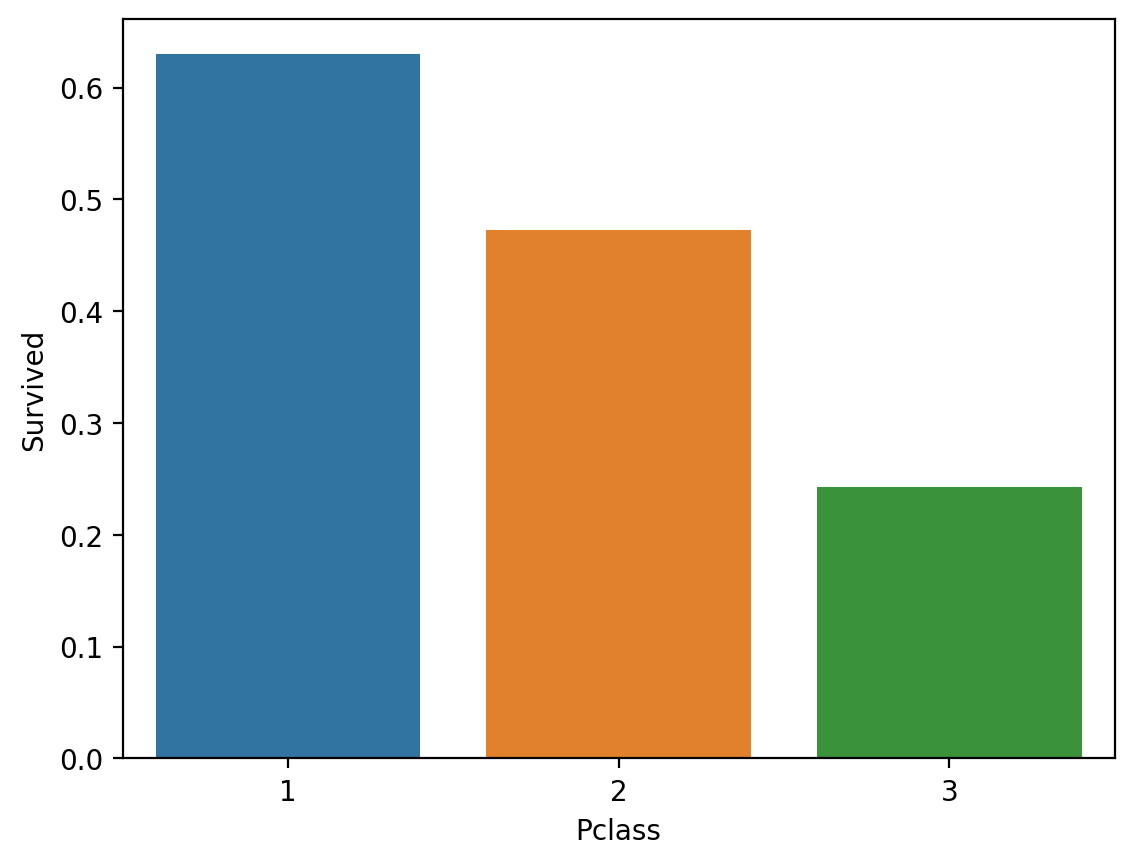

In [23]:
# Pclass 별 평균 생존률 확인하기 : 생존자의 퍼센트를 확인하기
pclass_survived = data.groupby('Pclass').mean()['Survived']
pclass_survived=pd.DataFrame(pclass_survived)
pclass_survived
sns.barplot(x=pclass_survived.index,y='Survived',data=pclass_survived)

<Axes: xlabel='Pclass', ylabel='count'>

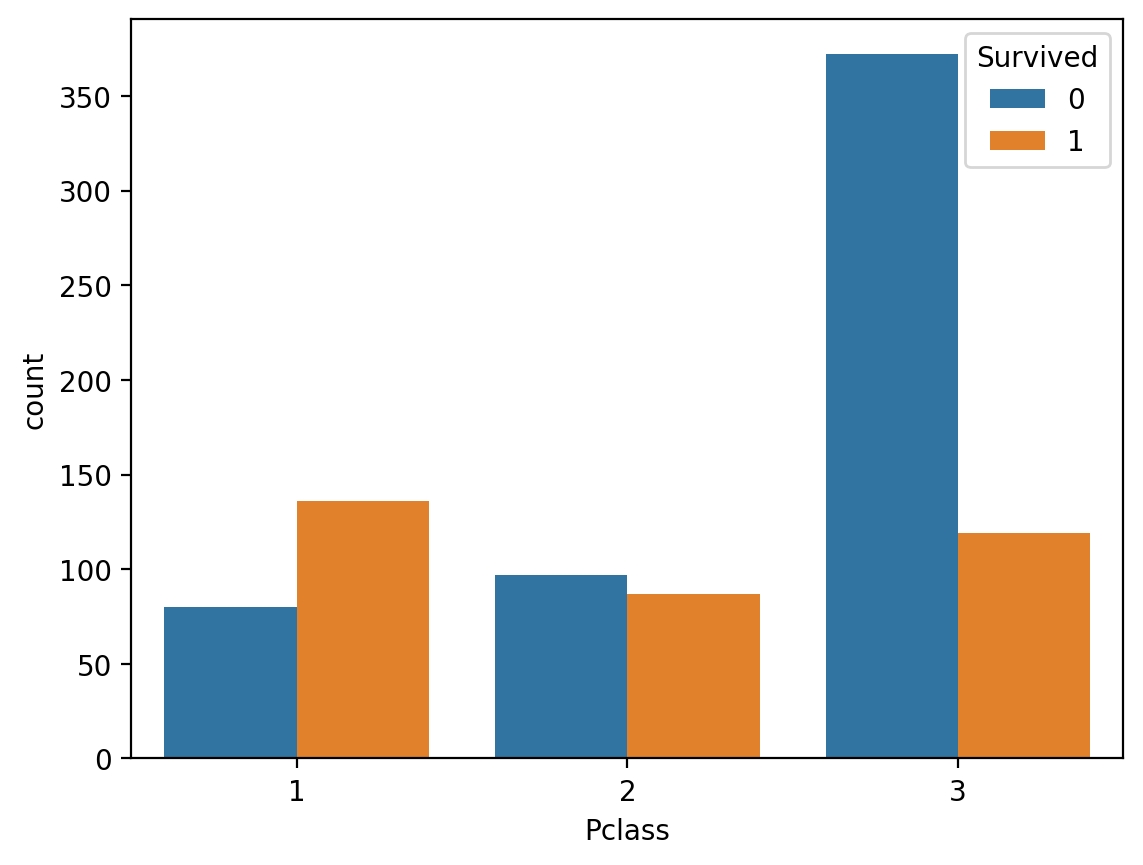

In [24]:
# pclass별 생존자의 수를 확인하기
sns.countplot(x='Pclass',hue='Survived',data=data)

### 4-5 Name
- 같은 이름이 존재하지 않음
- Mr, Ms, Mrs 와 같이 성별을 추론할 수 있는 단서들이 있음

In [25]:
#Name
data['Name'].unique #총 891개의 각기 다른 이름이 있음

<bound method Series.unique of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object>

### 4-6 Sex(성별)
- 남자 탑승객이 여자 탑승객보다 많음
- 여자 탑승객이 생존 확률이 약 4배 높음

male      577
female    314
Name: Sex, dtype: int64


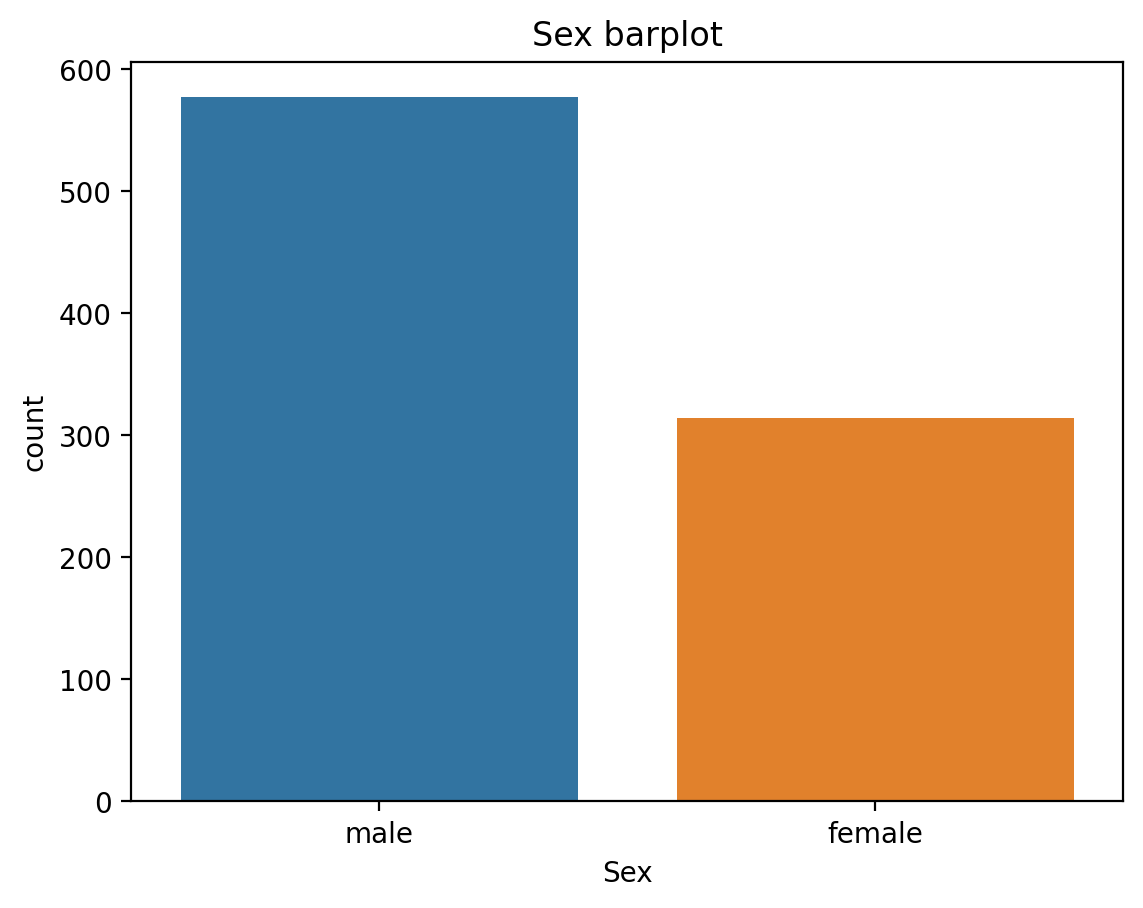

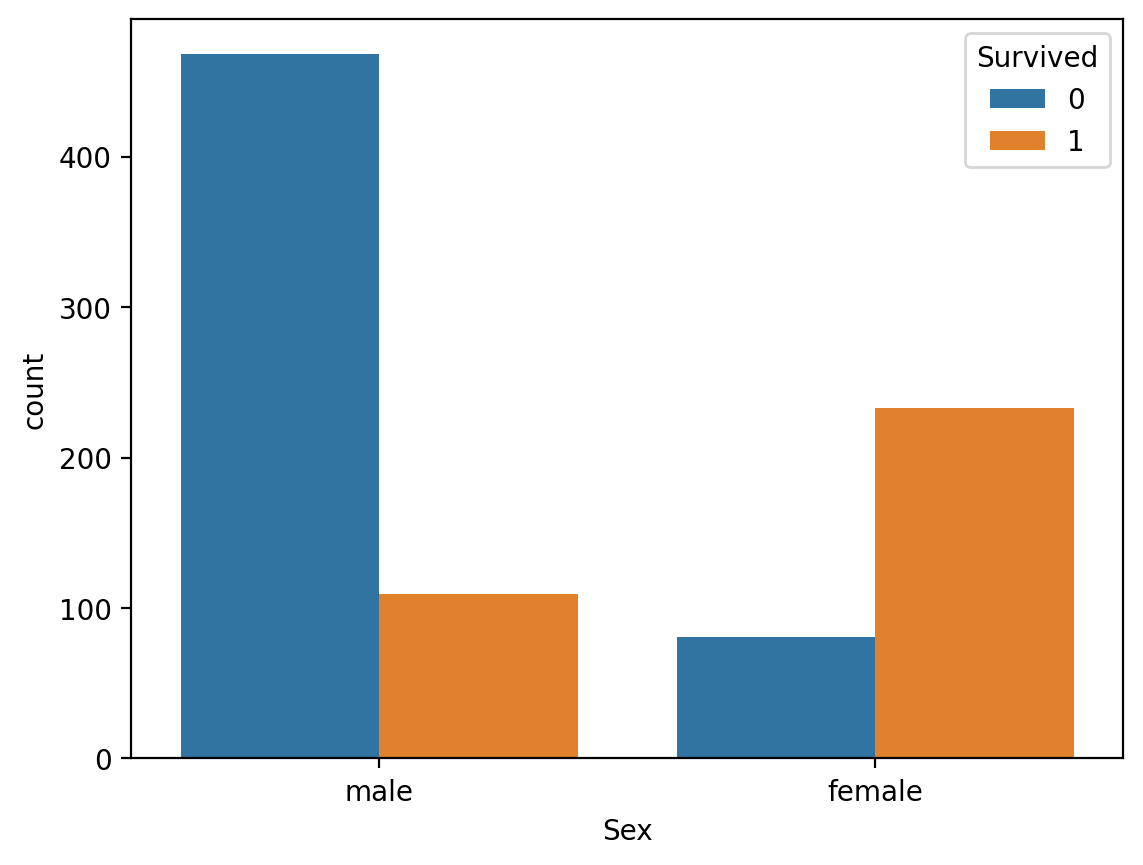

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\wandong\AppData\Local\Temp\ipykernel_16588\105997221.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('Sex').mean().Survived)


In [33]:
#Sex
print(data['Sex'].value_counts())
sns.countplot(x='Sex',data=data) #sns.countplot(x='Sex',data=data)
plt.title('Sex barplot')
plt.show()
#생존 여부와 관련이 있는지 살펴보기
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()
print(data[['Sex','Survived']].value_counts())
print(data.groupby('Sex').mean().Survived)

### 4-7 Age
- 20대-40대 탑승객이 많음
- 나이에 따른 생존 확률의 평균은 차이가 없어보임 -> 가설검정을 통해 더 자세히 유의성을 살펴볼 수 있다.

In [34]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

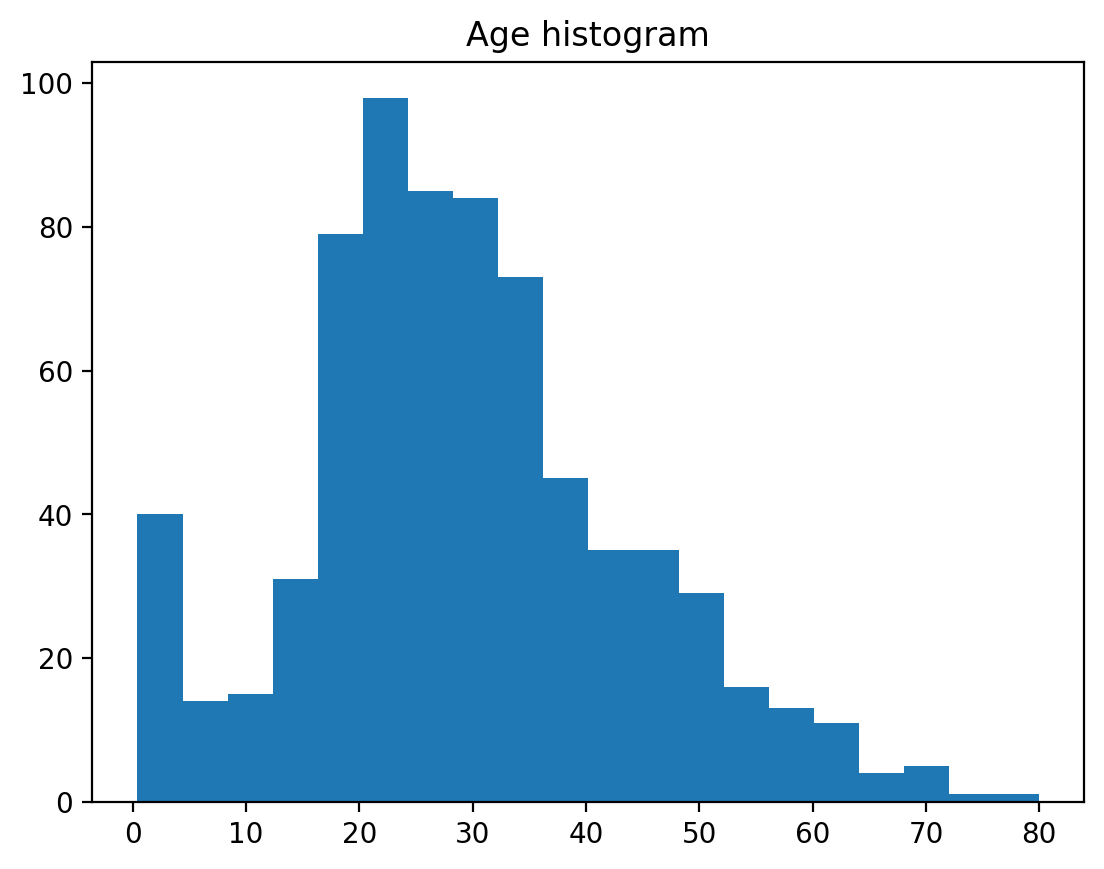

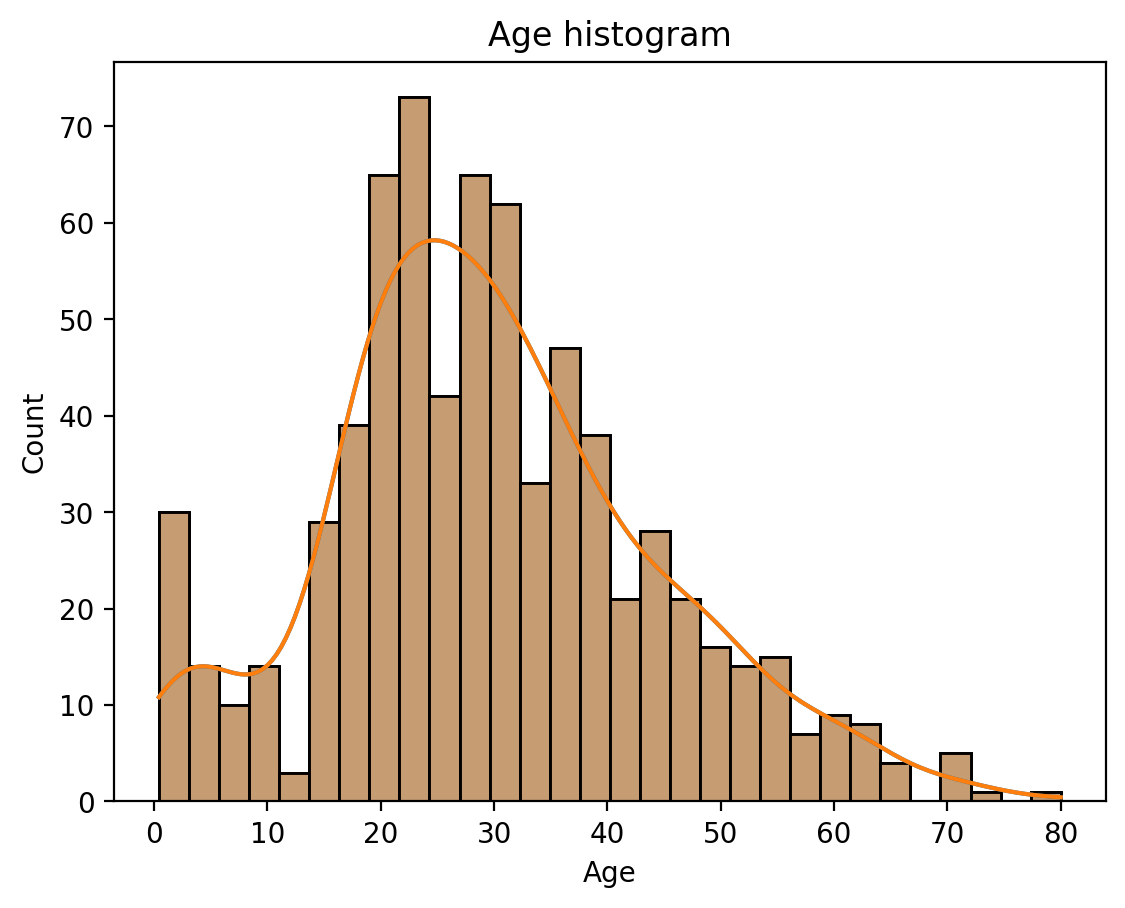

<Axes: xlabel='Survived', ylabel='Age'>

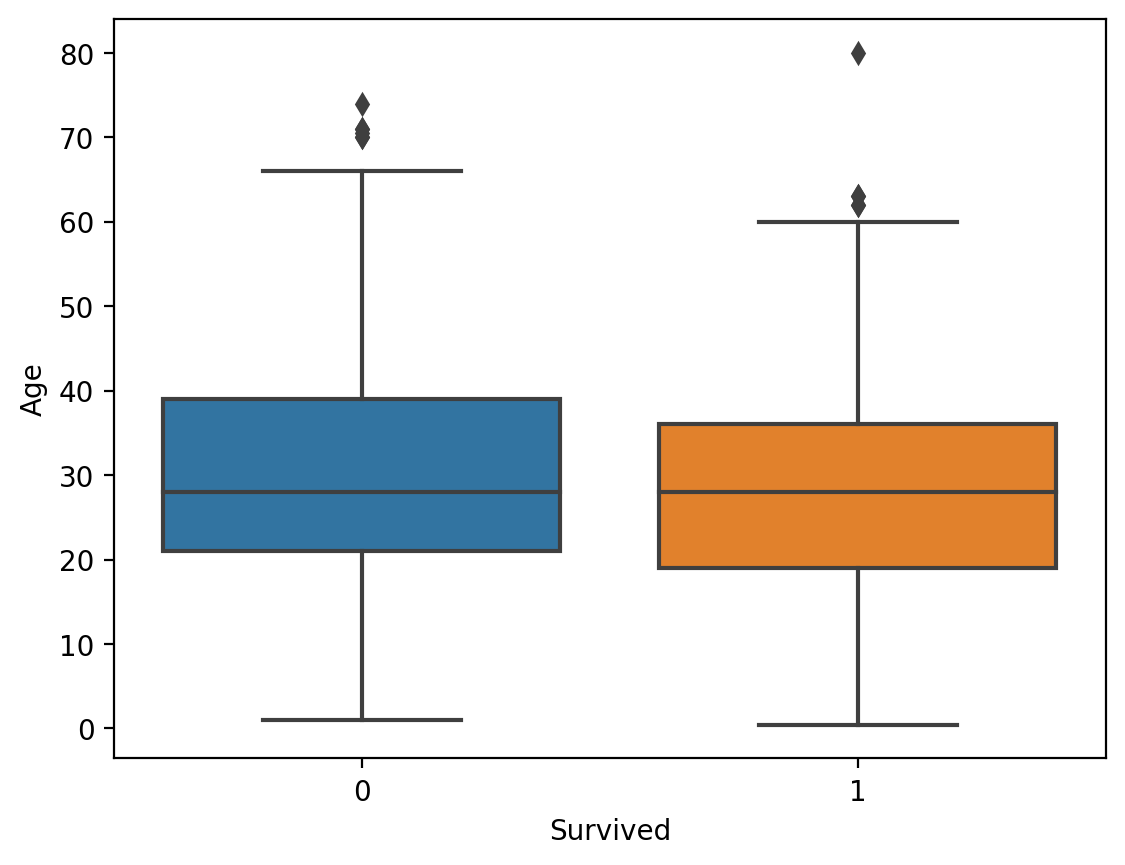

In [45]:
#Age
plt.hist(data.Age,bins=20)
plt.title('Age histogram',fontsize=12)
plt.show()

sns.histplot(data['Age'], bins=30, kde=True) #sns라이브러리
sns.histplot(x='Age',bins=30,kde=True,data=data)
plt.title('Age histogram',fontsize=12)
plt.show()

#나이와 생존여부 관계 살펴보기
sns.boxplot(x='Survived',y='Age',data=data)

<function matplotlib.pyplot.show(close=None, block=None)>

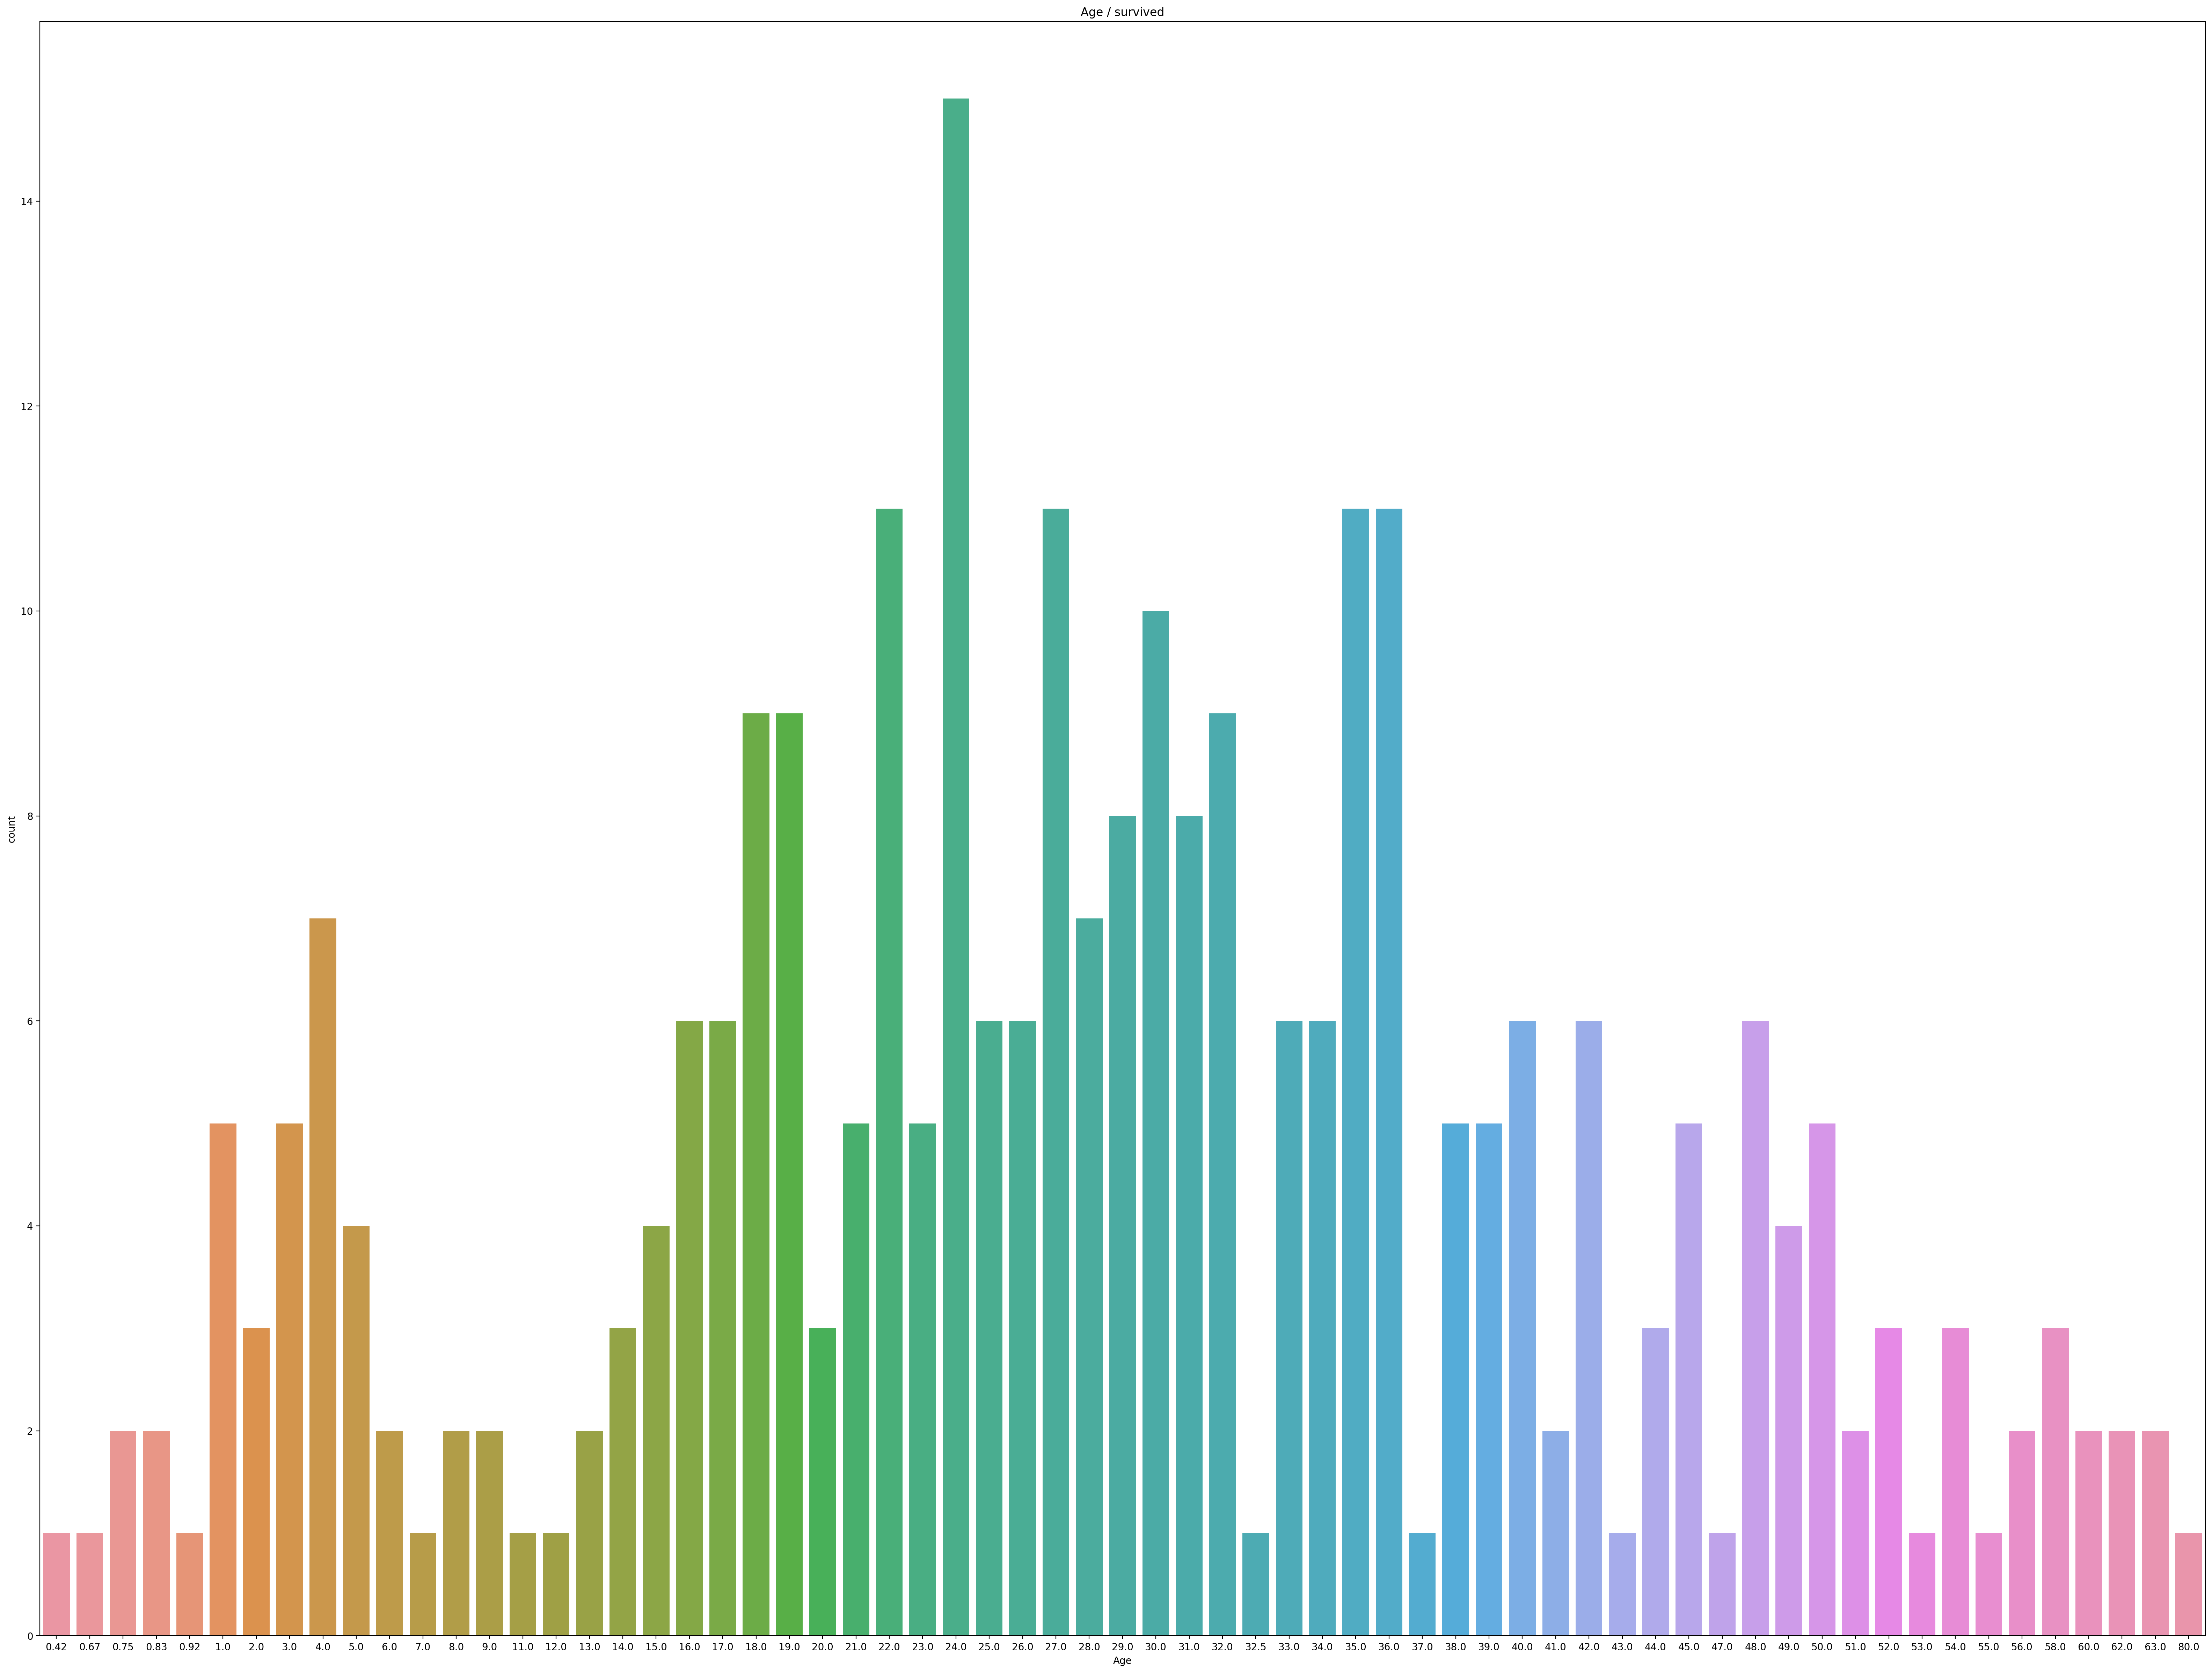

In [46]:
# 생존자의 나이대별 확인
plt.figure(figsize=(40,30))  #사이즈 조정
sns.countplot(x='Age',data=data[data['Survived']==1])
plt.title("Age / survived")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

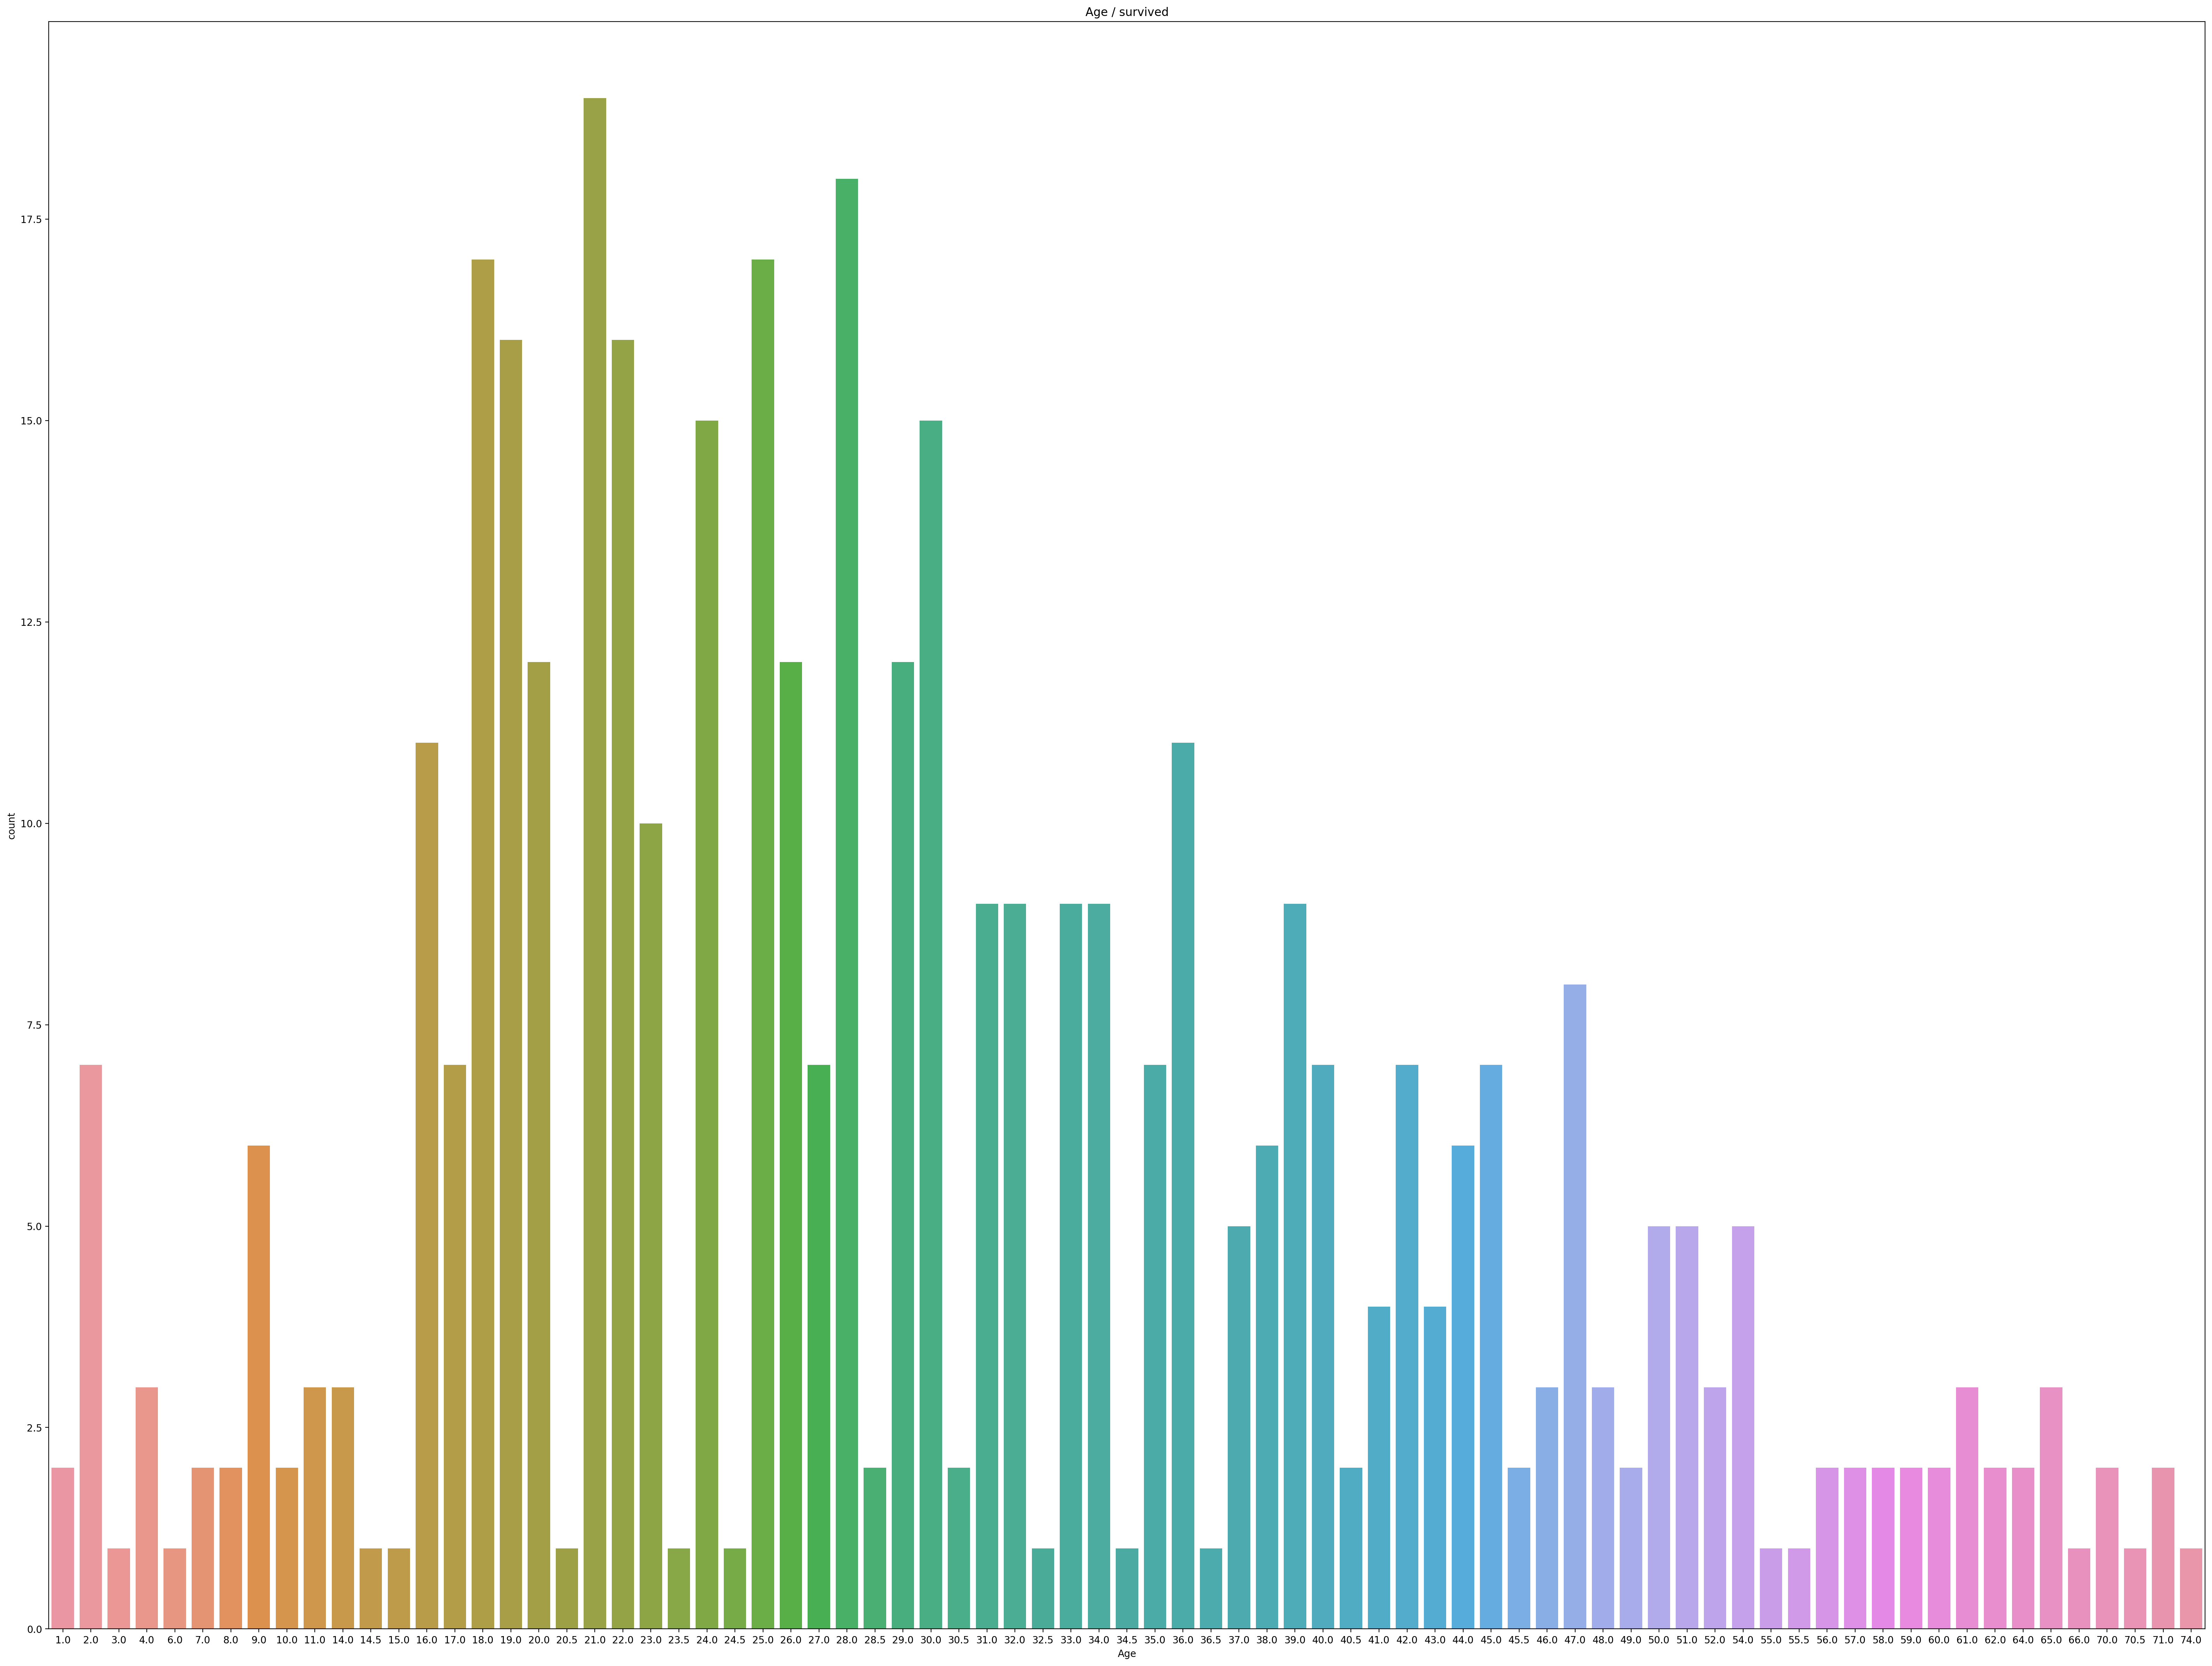

In [47]:
# 사망자의 나이대별 확인
plt.figure(figsize=(40,30))  #사이즈 조정
sns.countplot(x='Age',data=data[data['Survived']==0])
plt.title("Age / survived")
plt.show

### 4-8 SibSp(형제자매배우자수), Parch(부모자녀수)
- 둘 다 0이 제일 많음
- 형제 자매 배우자, 부모 자녀를 동반하지 않은 승객이 537명
- 형제자매수배우자가 많을수록 나이가 적음
- 부모자식 수가 커질수록 나이가 많아짐 -> 많은 자식 수를 가진 부모로 추론 가능, 단 이상행 존재


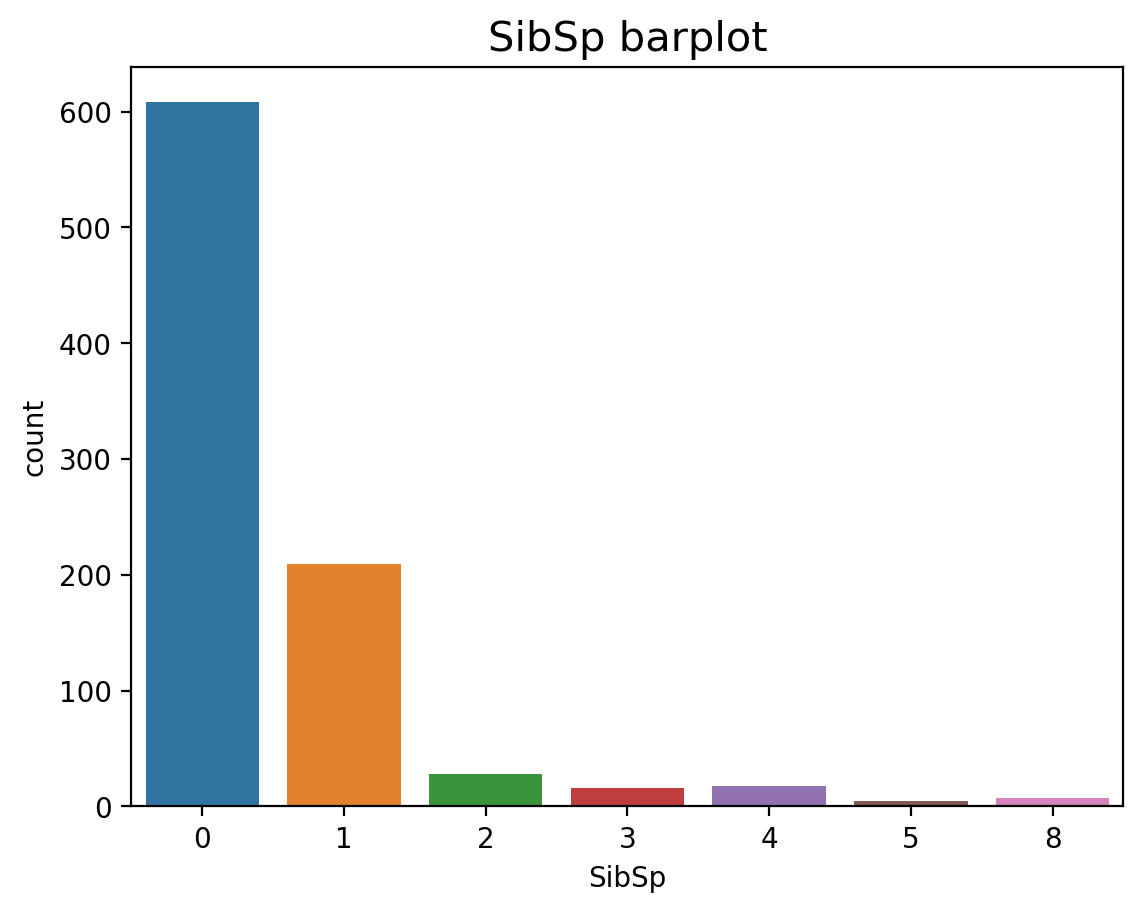

Text(0.5, 1.0, 'Parch barplot')

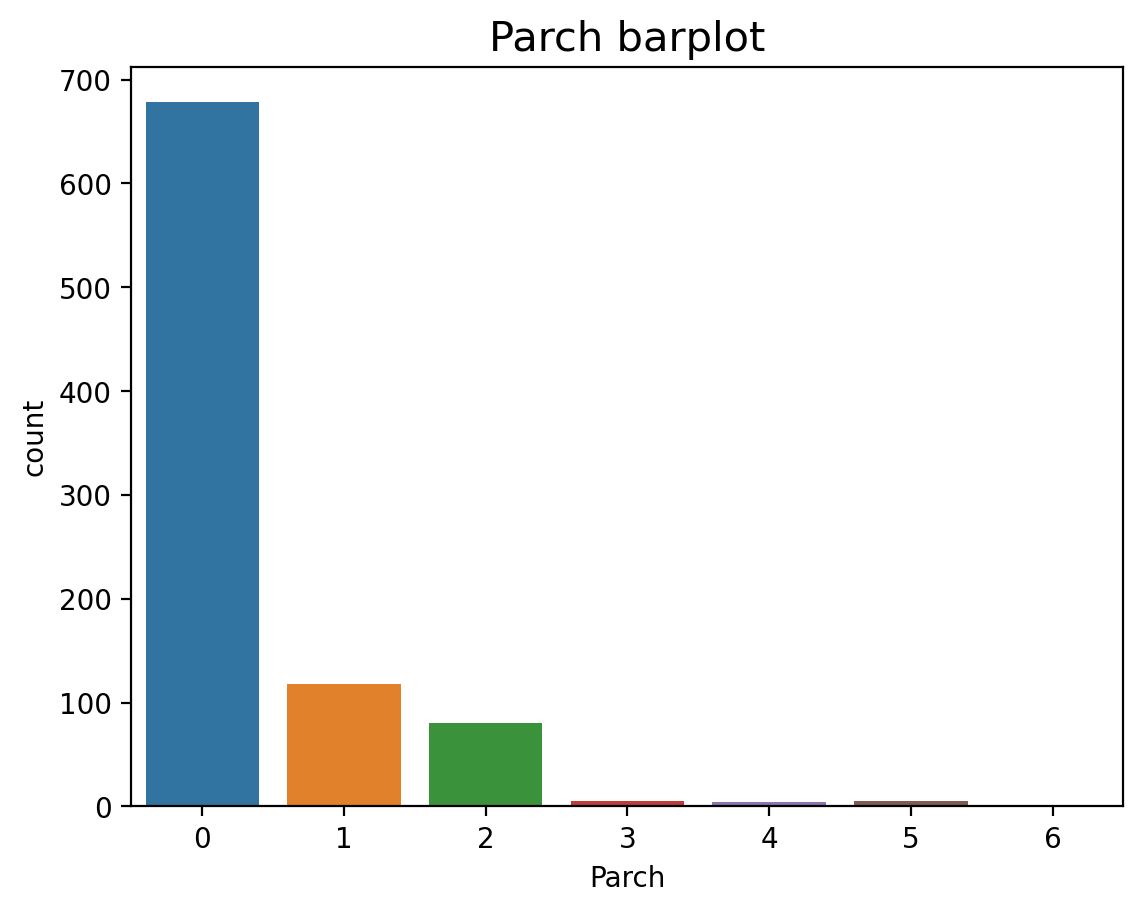

In [80]:
#SibSp, Parch barplot
sns.countplot(x="SibSp",data=data)
plt.title("SibSp barplot",fontsize=15)
plt.show()
sns.countplot(x="Parch",data=data)
plt.title("Parch barplot",fontsize=15)


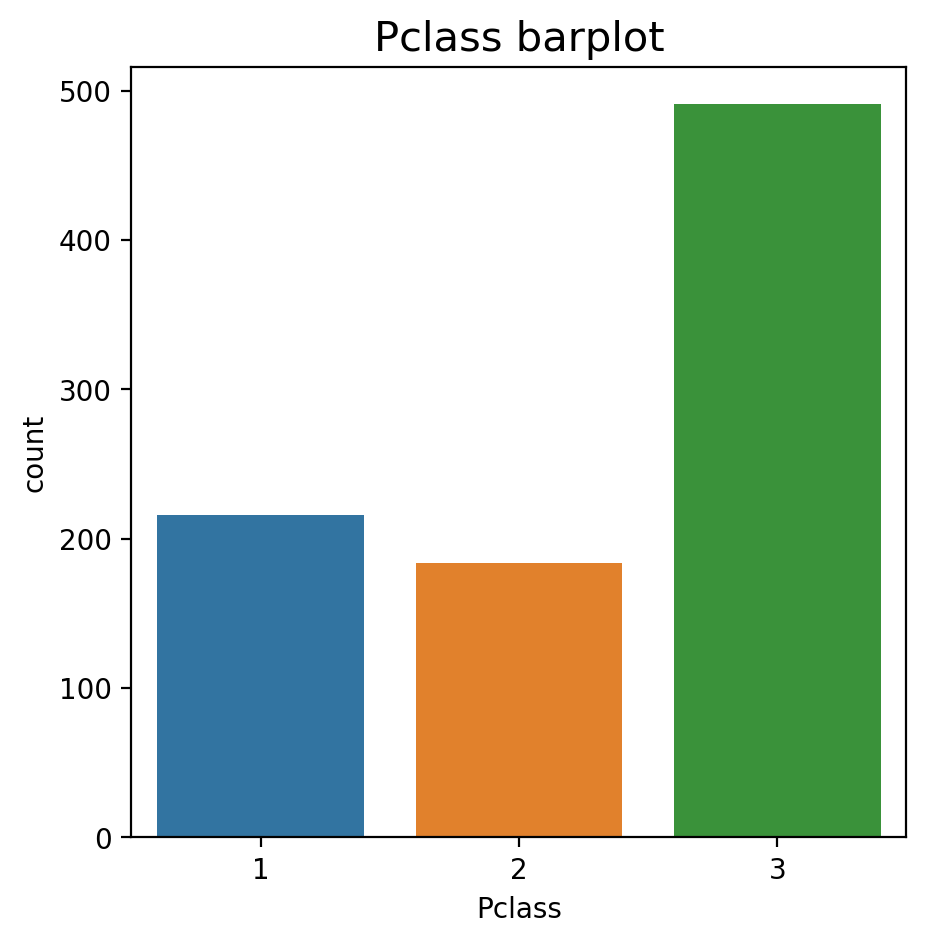

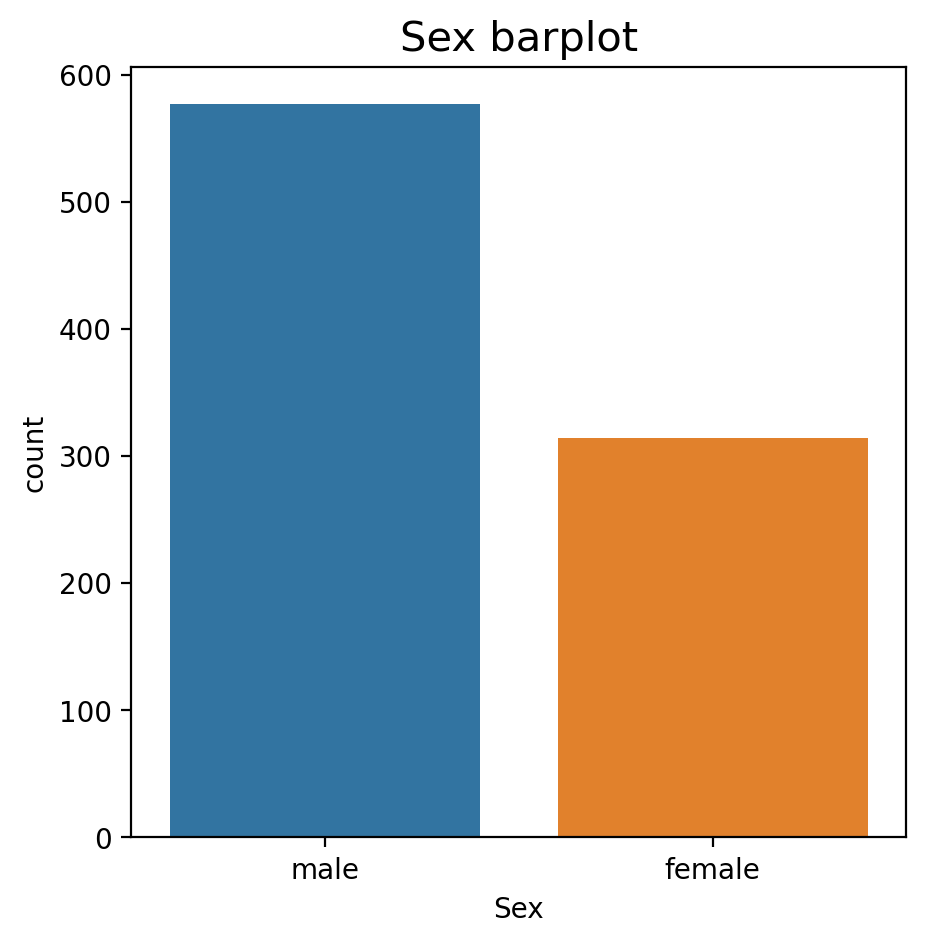

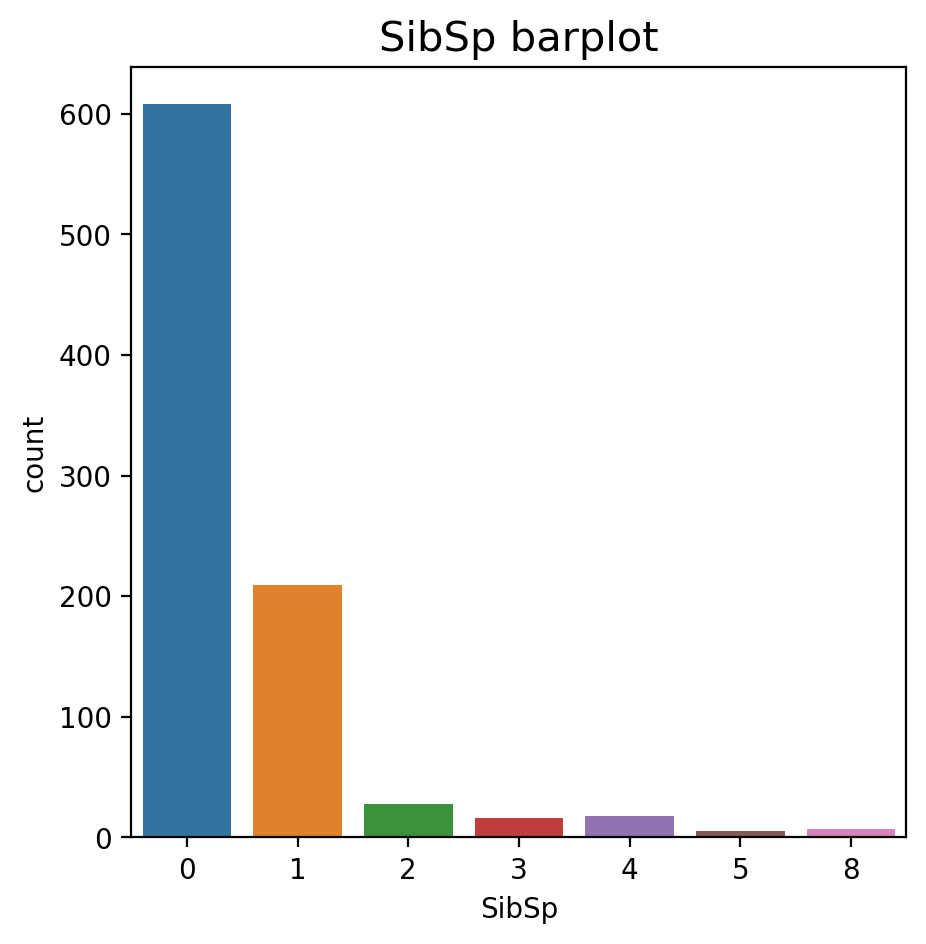

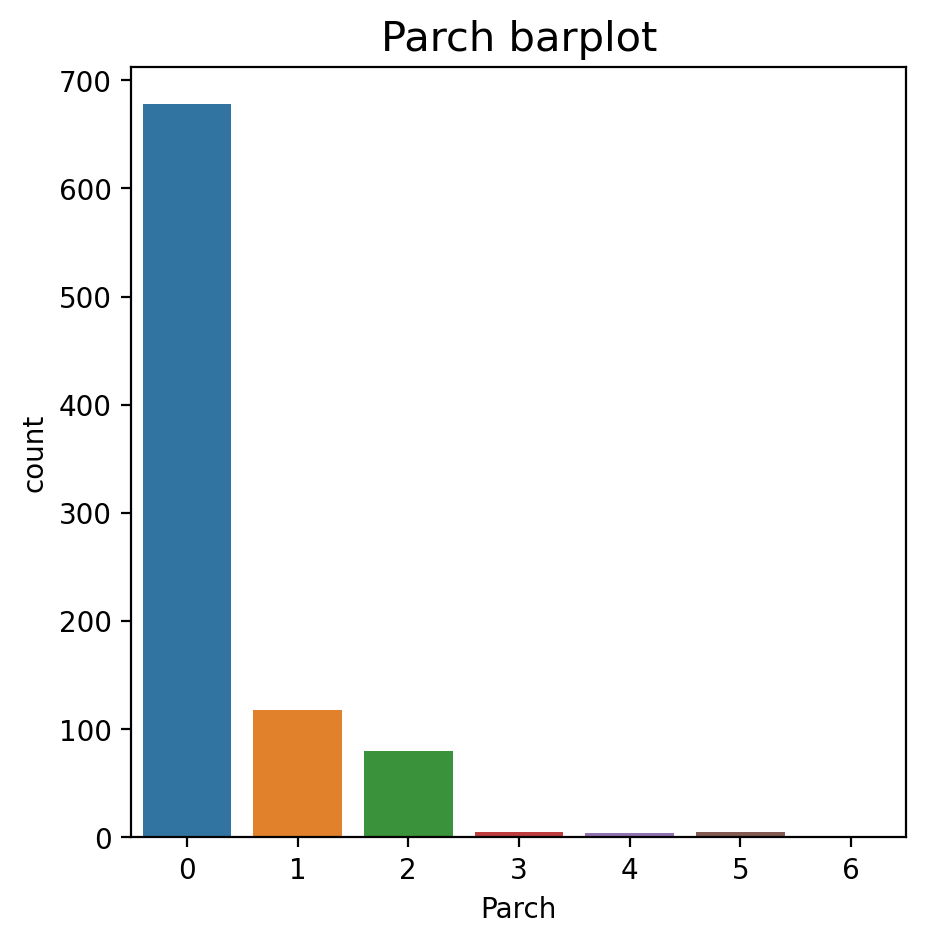

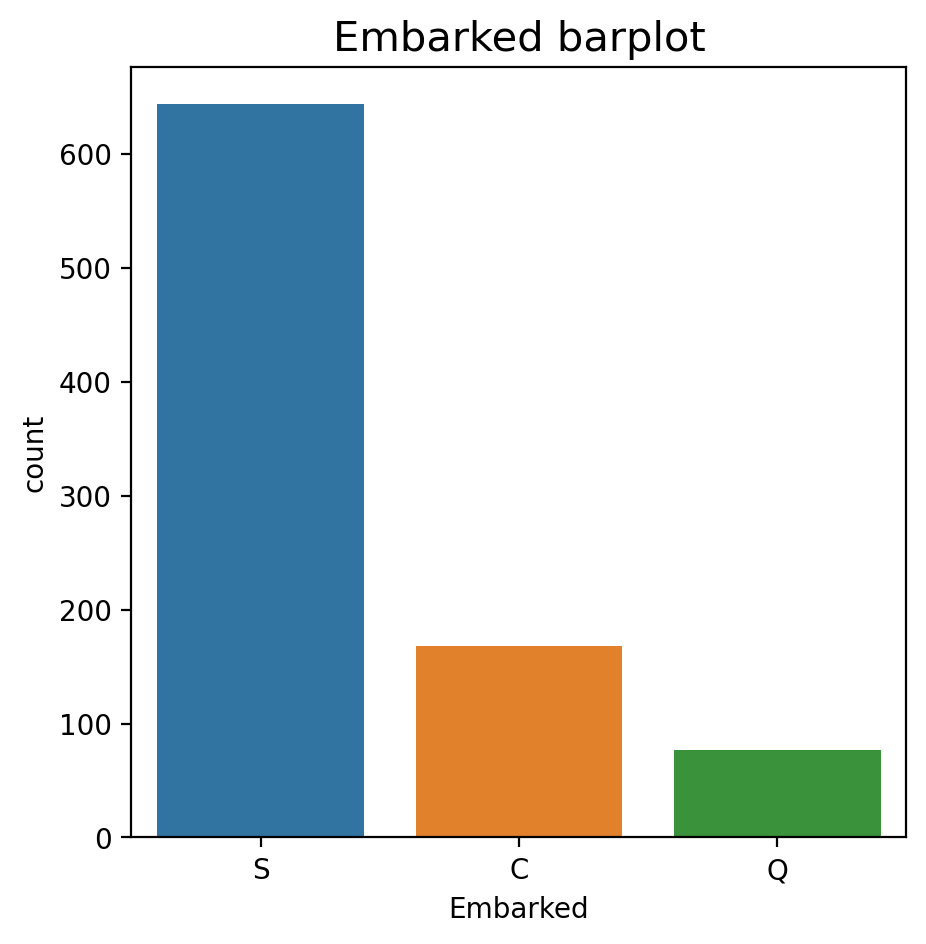

In [81]:
#for문을 사용하여 여러 칼럼의 countplot 그리기
for i in ['Pclass','Sex','SibSp','Parch','Embarked']:
    plt.figure(figsize=(5,5))
    sns.countplot(x=i,data=data)
    plt.title(i+' barplot',fontsize=15)
    plt.show()

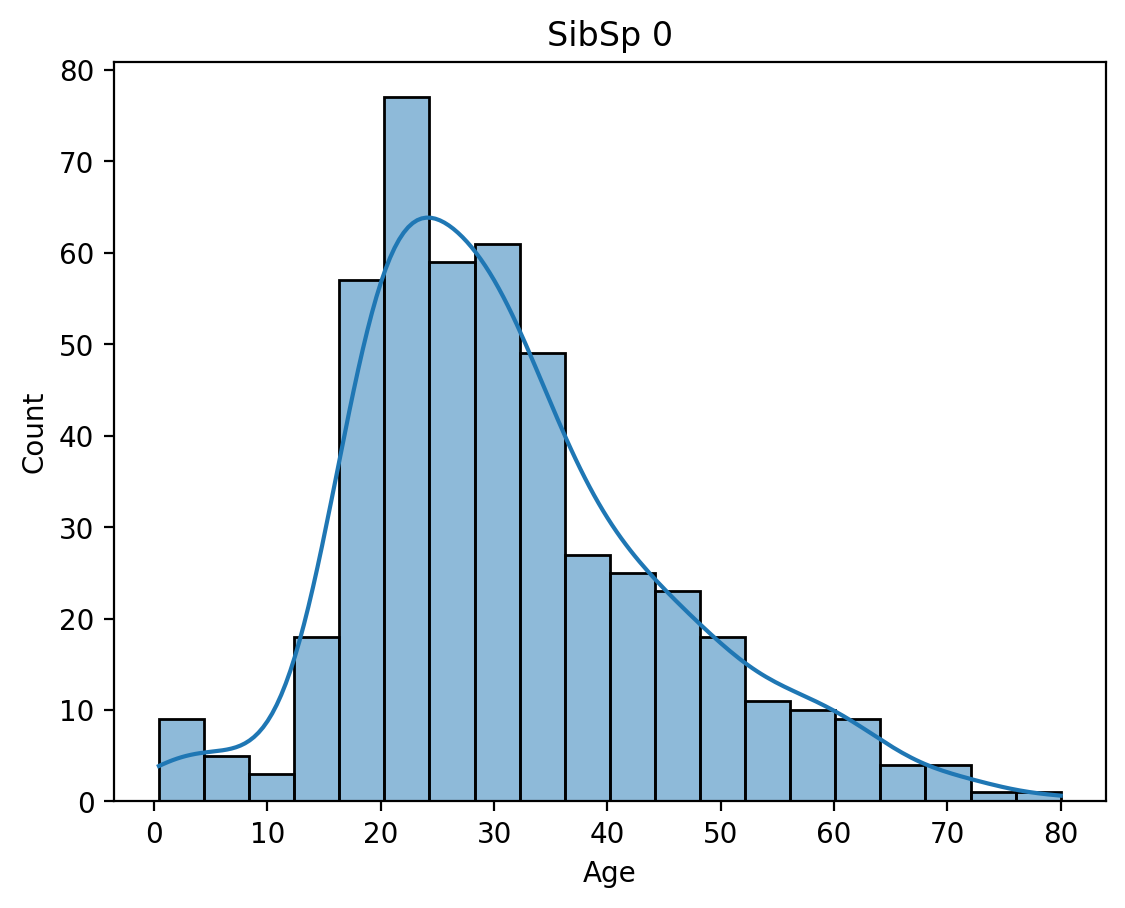

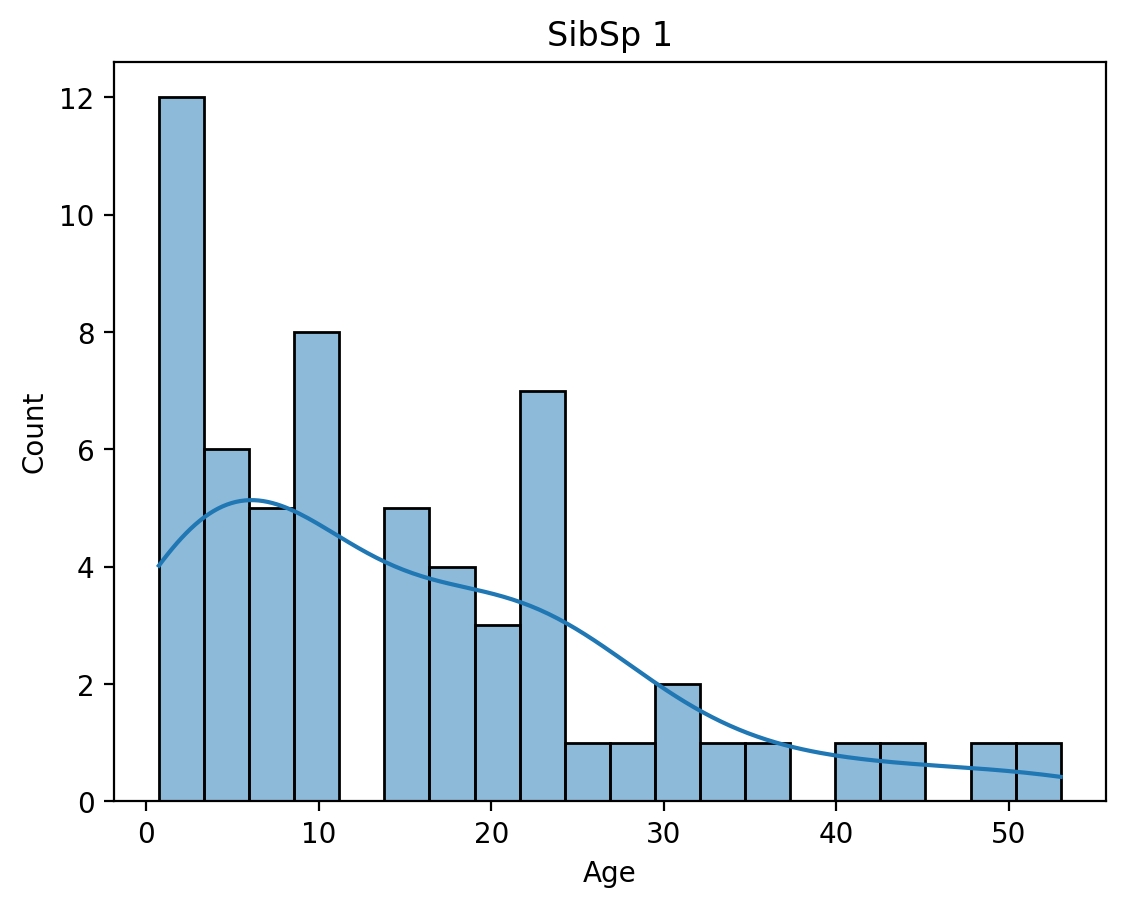

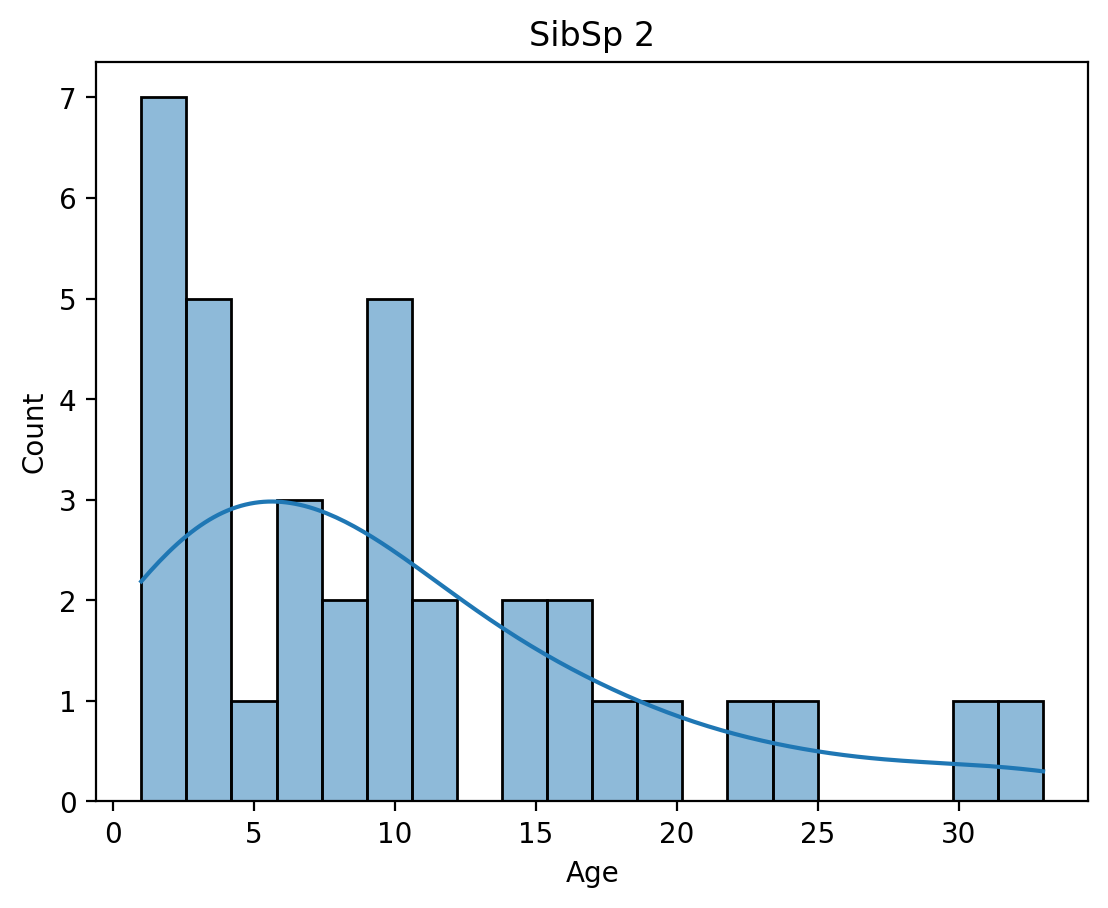

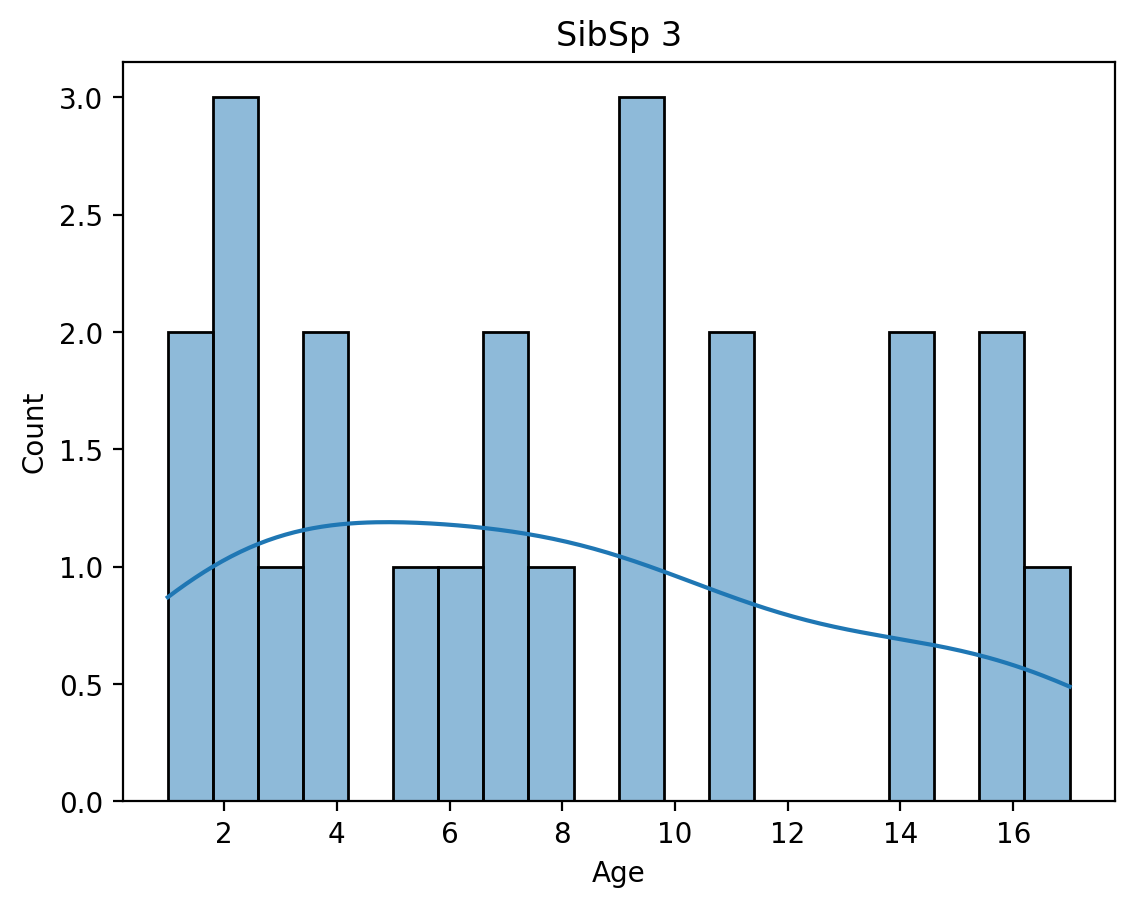

In [61]:
#SibSp 0인 행 시각화
sns.histplot(data[(data.SibSp==0)]['Age'],bins=20,kde=True)
plt.title("SibSp 0")
plt.show()

sns.histplot(data[(data.SibSp>1)]['Age'],bins=20,kde=True)
plt.title("SibSp 1")
plt.show()

sns.histplot(data[(data.SibSp>2)]['Age'],bins=20,kde=True)
plt.title("SibSp 2")
plt.show()

sns.histplot(data[(data.SibSp>3)]['Age'],bins=20,kde=True)
plt.title("SibSp 3")
plt.show()

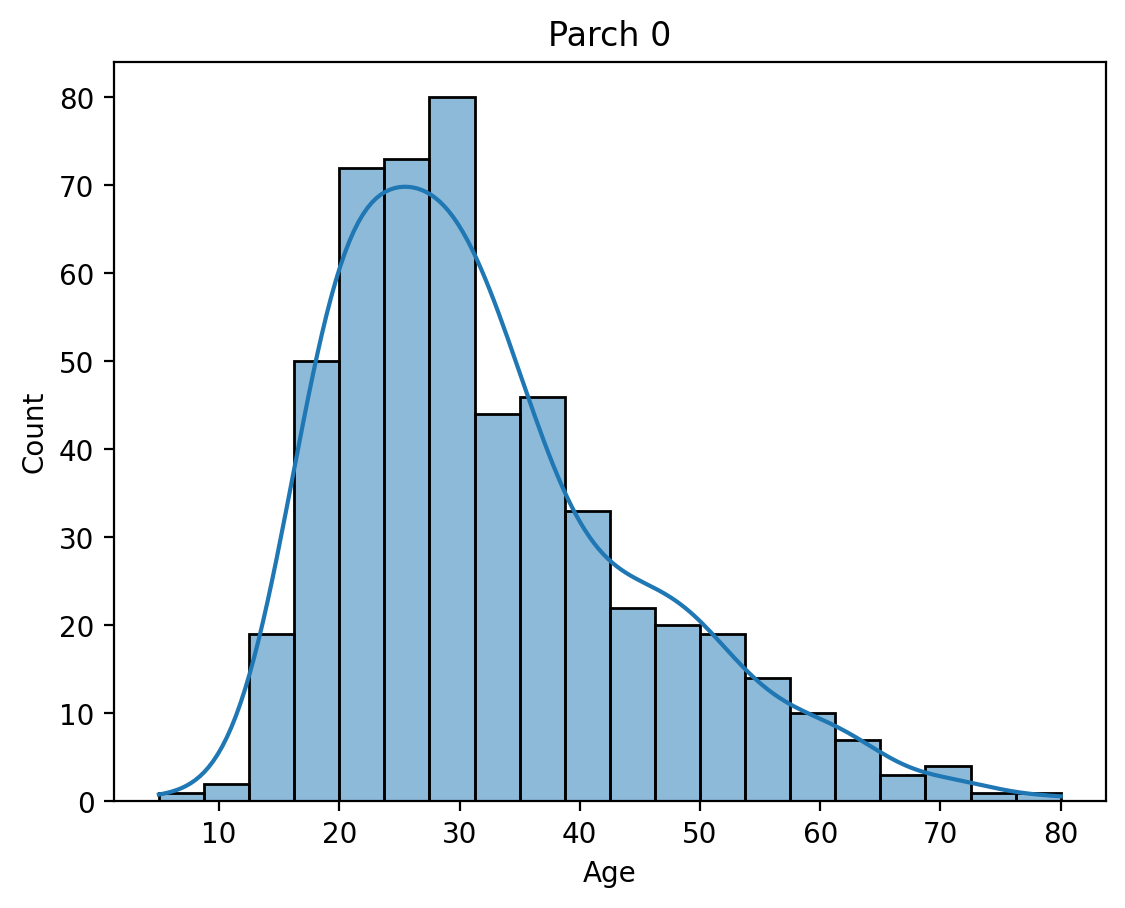

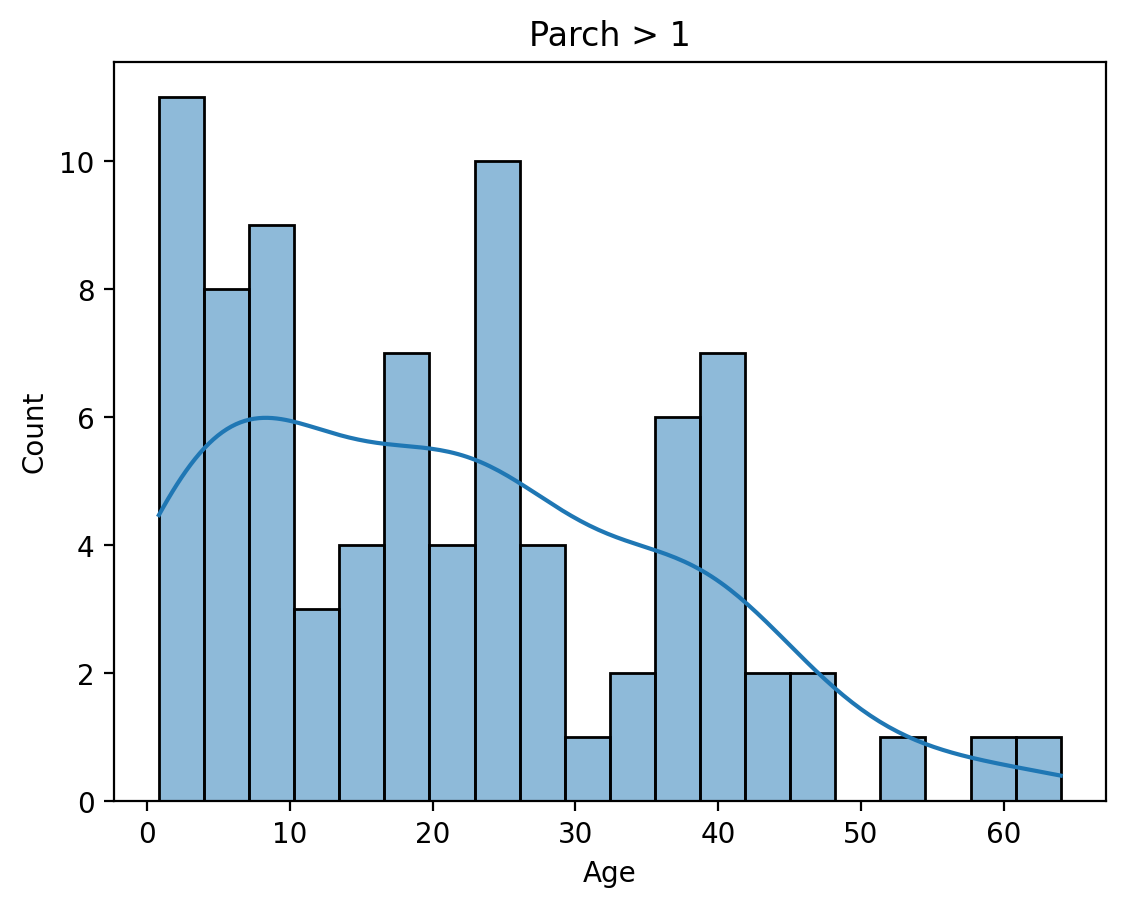

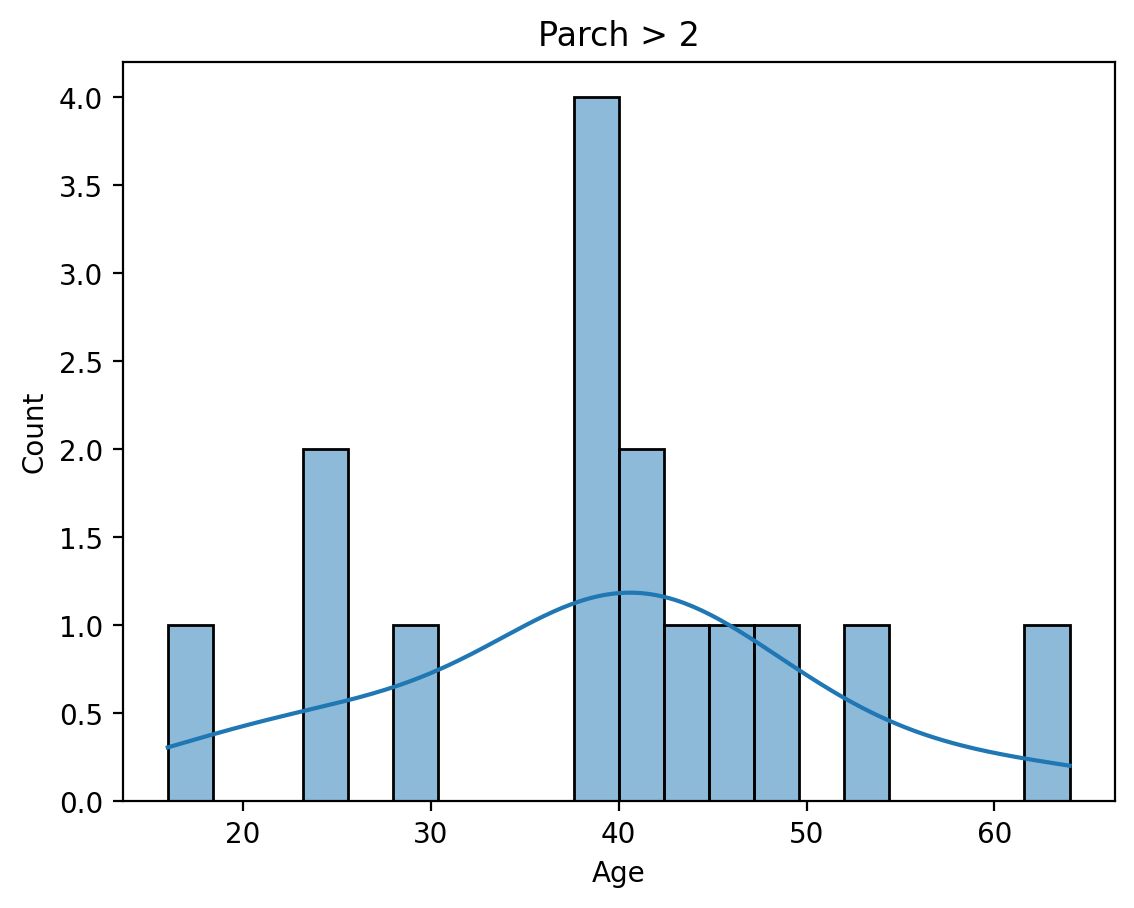

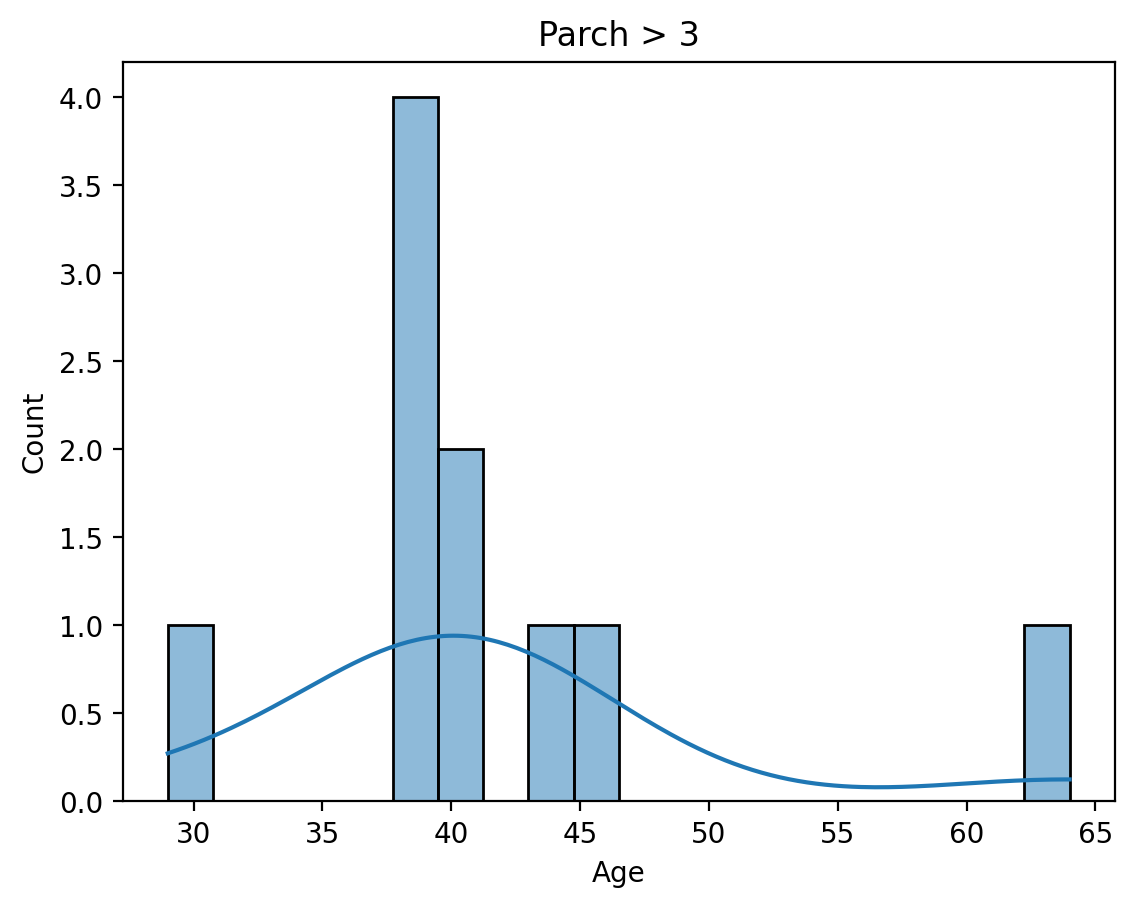

In [59]:
sns.histplot(data[(data.Parch==0)]['Age'],bins=20,kde=True)
plt.title("Parch 0")
plt.show()

sns.histplot(data[(data.Parch>1)]['Age'],bins=20,kde=True)
plt.title("Parch > 1")
plt.show()

sns.histplot(data[(data.Parch>2)]['Age'],bins=20,kde=True)
plt.title("Parch > 2")
plt.show()

sns.histplot(data[(data.Parch>3)]['Age'],bins=20,kde=True)
plt.title("Parch > 3")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

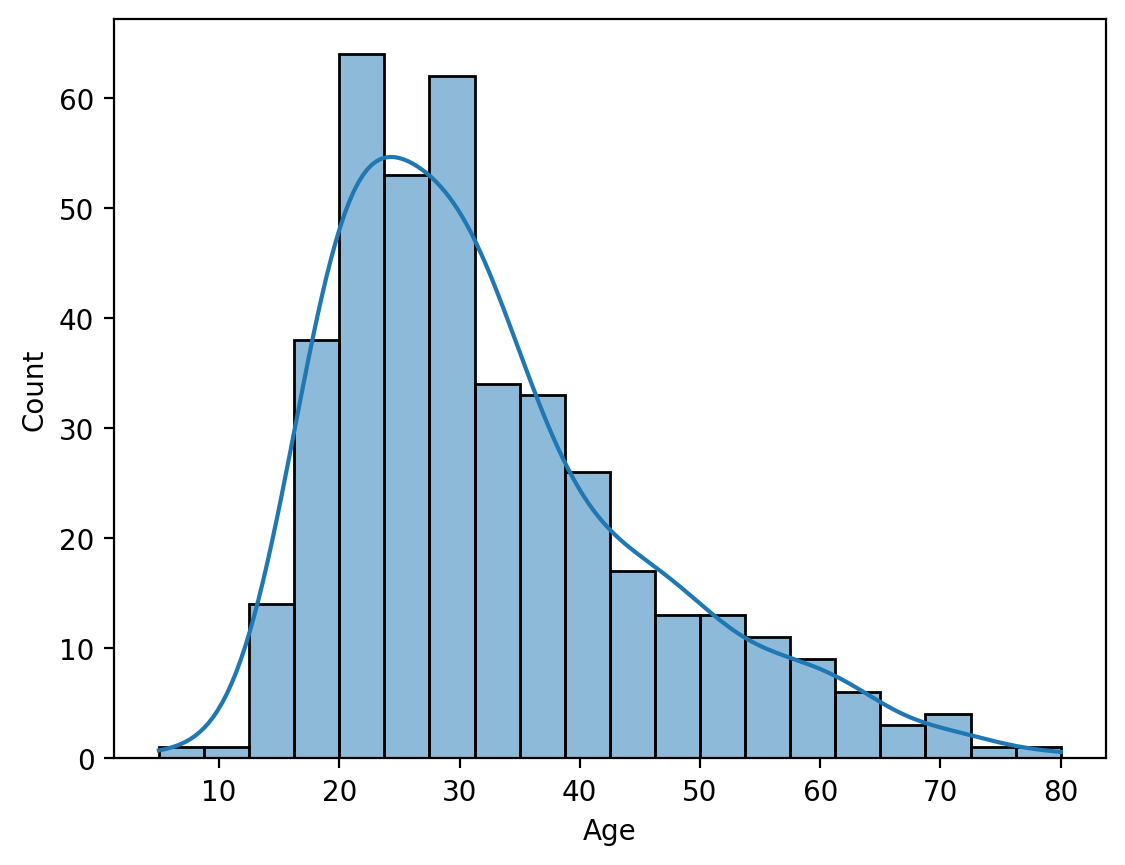

In [85]:
#SibSp, Parch 모두 0인 행 추출
data[(data.SibSp==0) & (data.Parch==0)]  #537행
sns.histplot(data[(data.SibSp==0) & (data.Parch==0)]['Age'],bins=20,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

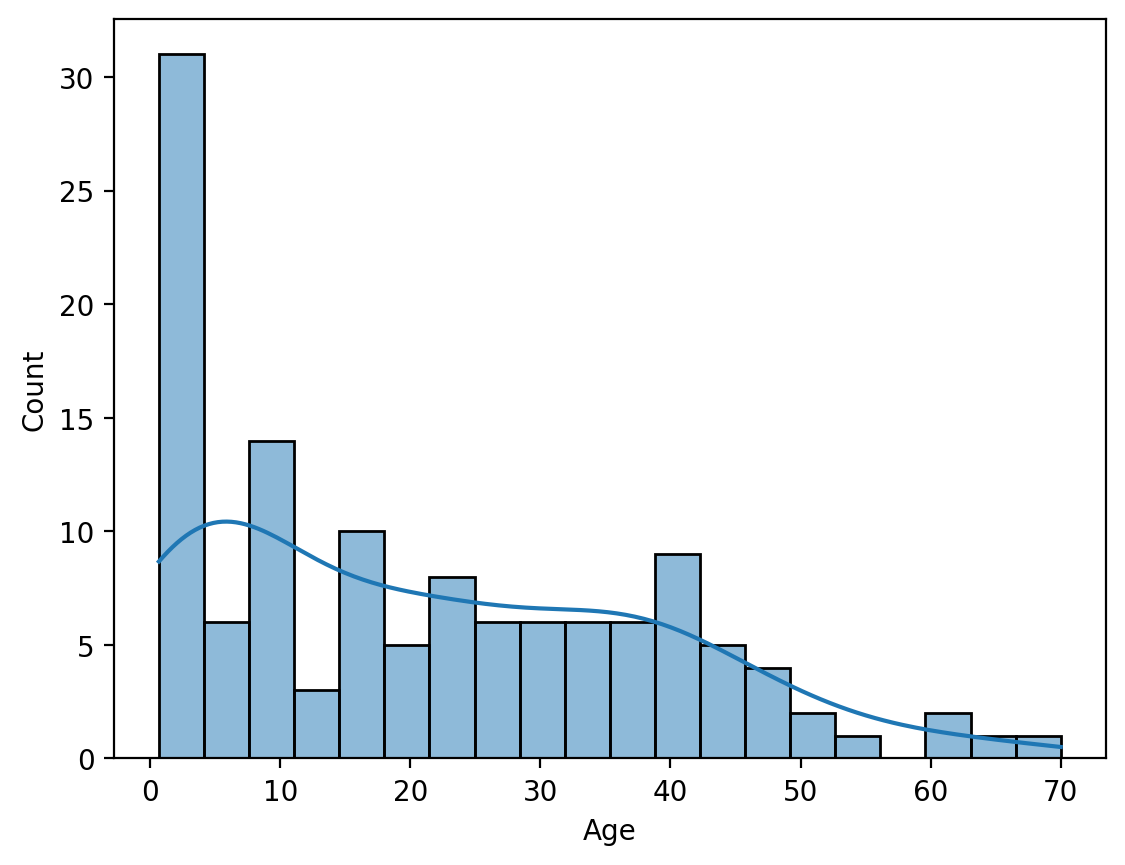

In [91]:
#SibSp, Parch 모두 0인 행 추출
data[(data.SibSp!=0) & (data.Parch!=0)] #537행
sns.histplot(data[(data.SibSp!=0) & (data.Parch!=0)]['Age'],bins=20,kde=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


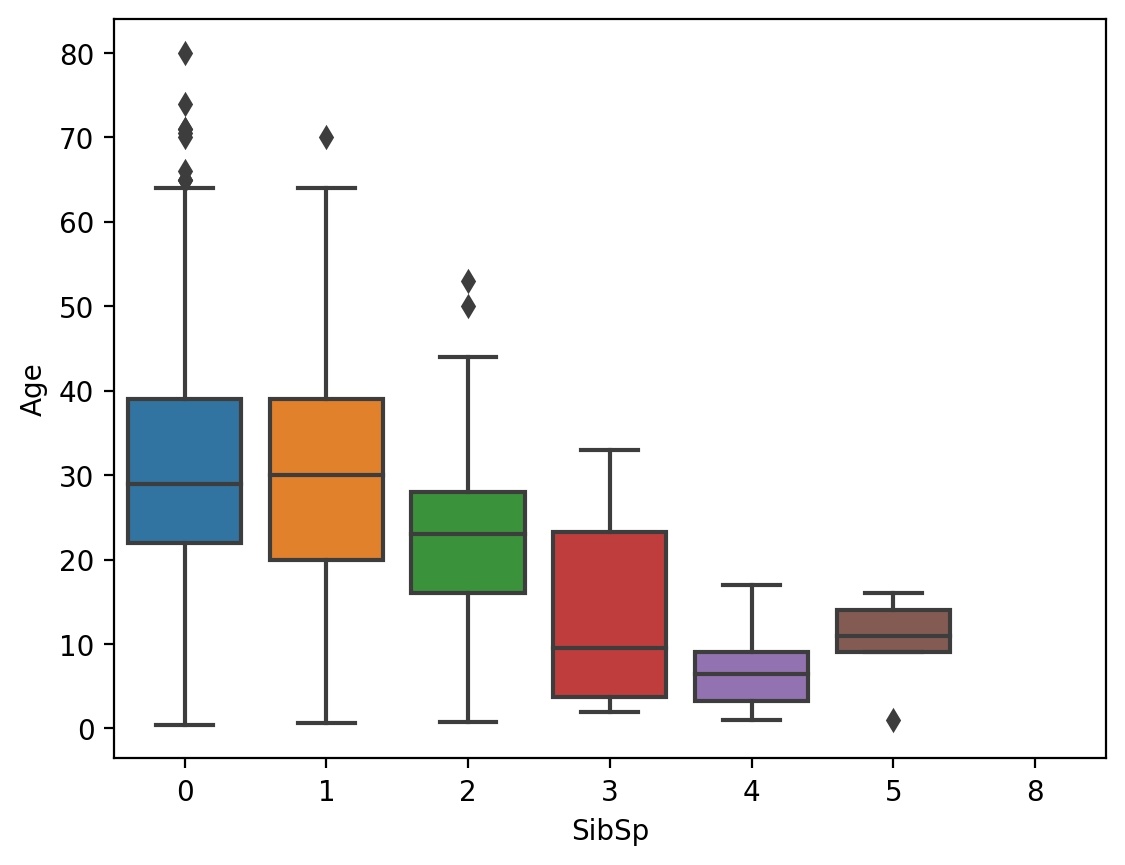

In [62]:
#나이와 SipSp
sns.boxplot(x='SibSp',y='Age',data=data)
data[data.SibSp>=5]

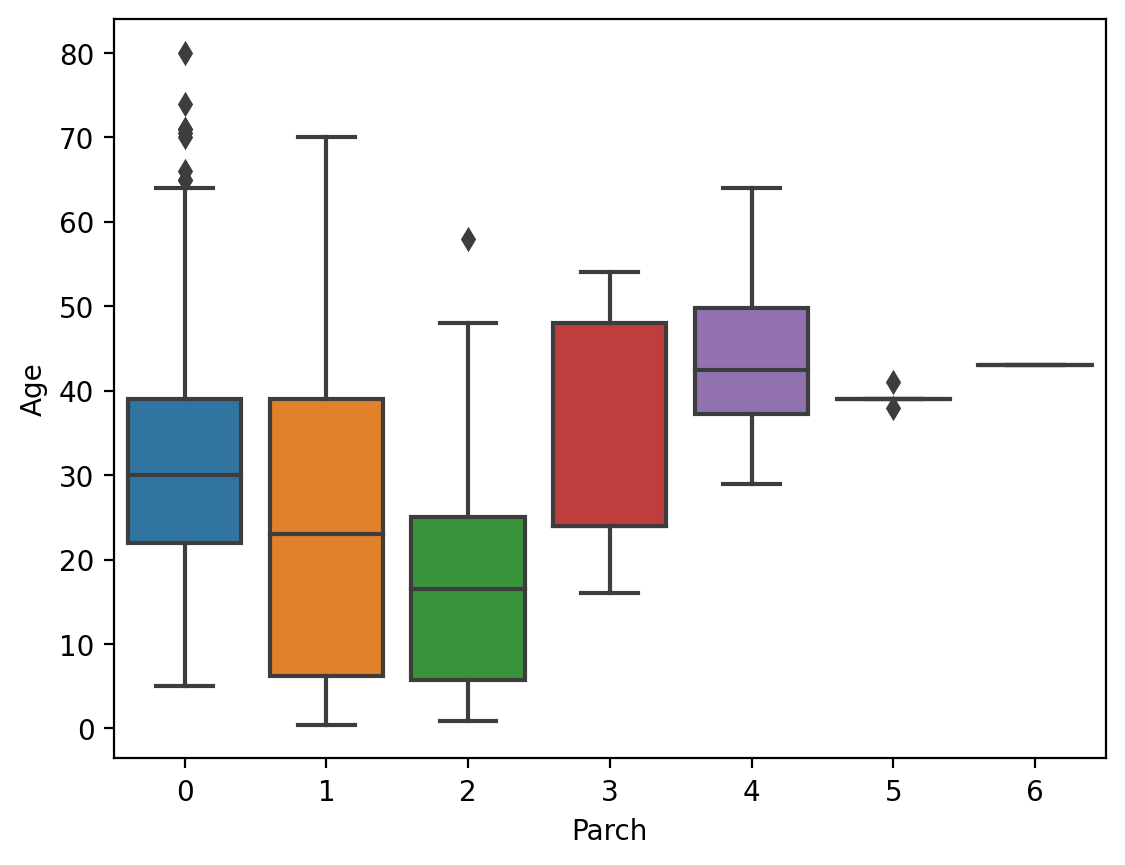

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S


In [63]:
#Age, Parch
sns.boxplot(x='Parch',y='Age',data=data)
plt.show()
#Parch 3 이상이면 나이가 많아짐 -> 많은 자식 수를 가진 부모로 추론 가능
data[data.Parch>=3]

### 4-9 Ticket
- 알파벳과 숫자로 이루어진 티켓 / 숫자로만 이루어진 티켓 존재
- 숫자로만 이루어진 티켓은 맨 앞자리가 Pclass인 것으로 추정, 티켓에 자리에 대한 단서가 있을 수 있음

In [64]:
# Ticket
print('Ticket value counts : \n',data['Ticket'].value_counts())
print(data.Ticket.unique())

Ticket value counts : 
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345

In [66]:
# 알파벳을 포함하고 있는 티켓
data[data.Ticket.str.contains('[a-zA-Z]')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [67]:
data[~data.Ticket.str.contains('[a-zA-Z]')]  #알파벳이 들어가지 않은 행 추출

# 맨 앞에 있는 숫자가 Pclass랑 같은 것을 확인해볼 수 있음, 즉 Ticket은 티켓클래스와 함께 해당 승객의 정보를 가지고 있는 변수일 수 있다
# pd.DataFrame([int(i[0]) for i in data[~data.Ticket.str.contains('[a-zA-Z]')].Ticket]).value_counts()  #맨 첫번째 숫자의 빈도 확인하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
data.Ticket.str.extract('([a-zA-Z]+)').value_counts()  #앞에 있는 알파벳만 출력하기

PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
Fa        1
SCO       1
SO        1
SW        1
dtype: int64

### 4-10. Fare(요금)
- 연속형 변수로, 치우쳐져 있는 히스토그램
- 생존 집단이 사망 집단보다 생존확률이 약 2배 높음 -> 등석이 낮을수록 비싸기 때문으로 추정
- 나이와 요금 사이의 상관 계수 0.096으로 의미가 없어보임 -> 어린 승객이라도 부모와 함께 오며, 부모가 금액을 부담하기 때문으로 추정

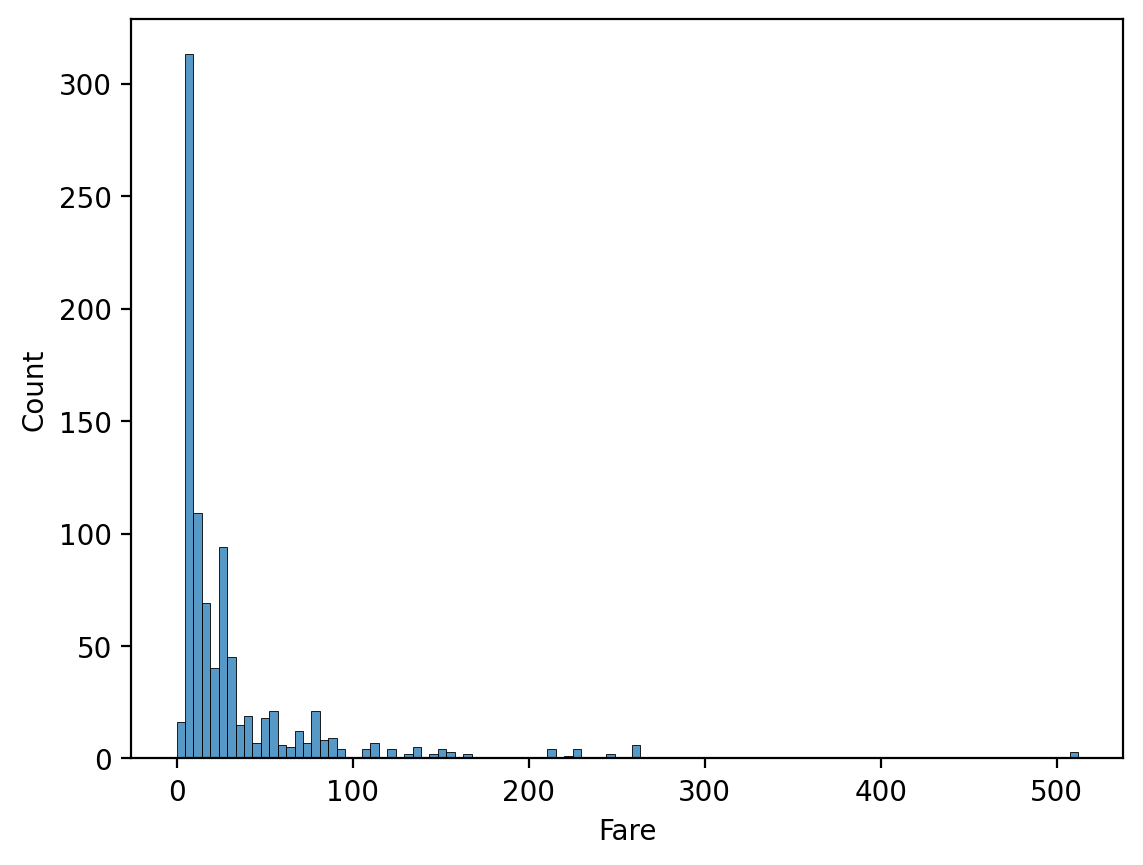

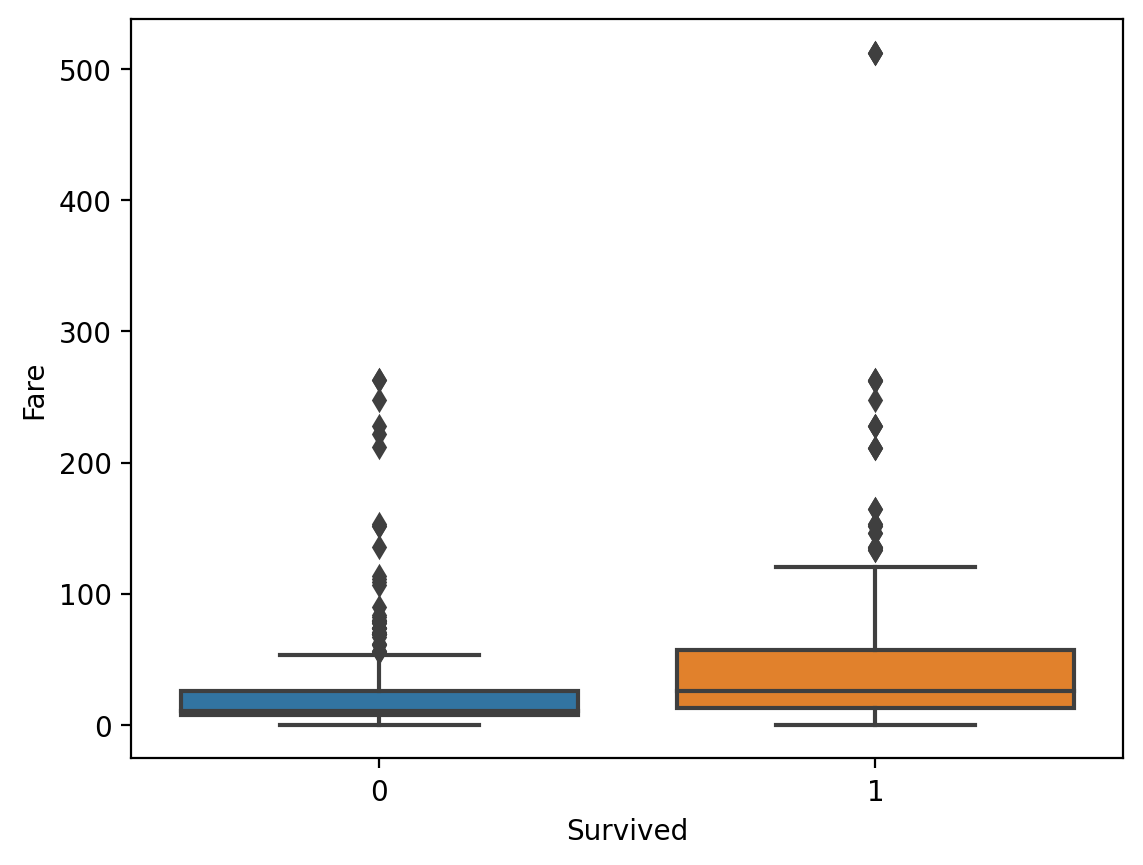

C:\Users\wandong\AppData\Local\Temp\ipykernel_24372\2227499039.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Survived').mean().Fare


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [99]:
# Fare
sns.histplot(data["Fare"])
plt.show()

#요금과 생존 여부 살펴보기
sns.boxplot(x='Survived',y='Fare',data=data)
plt.show()
data.groupby('Survived').mean().Fare

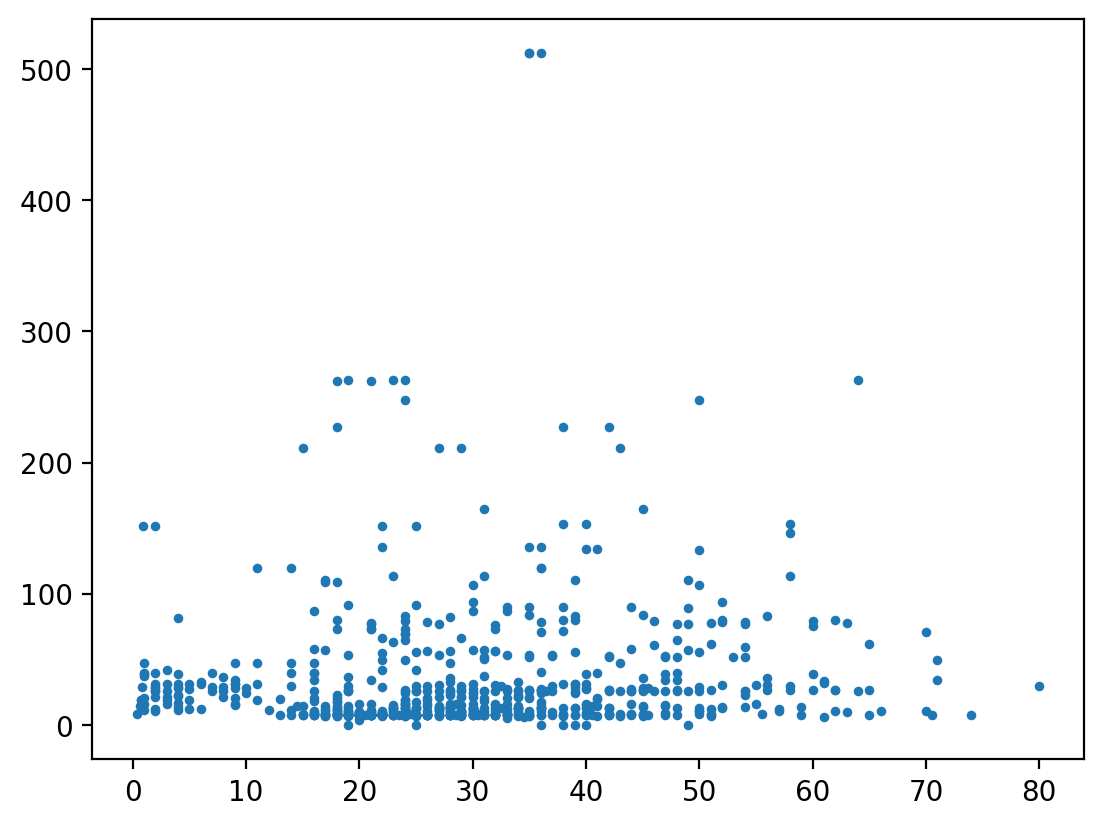

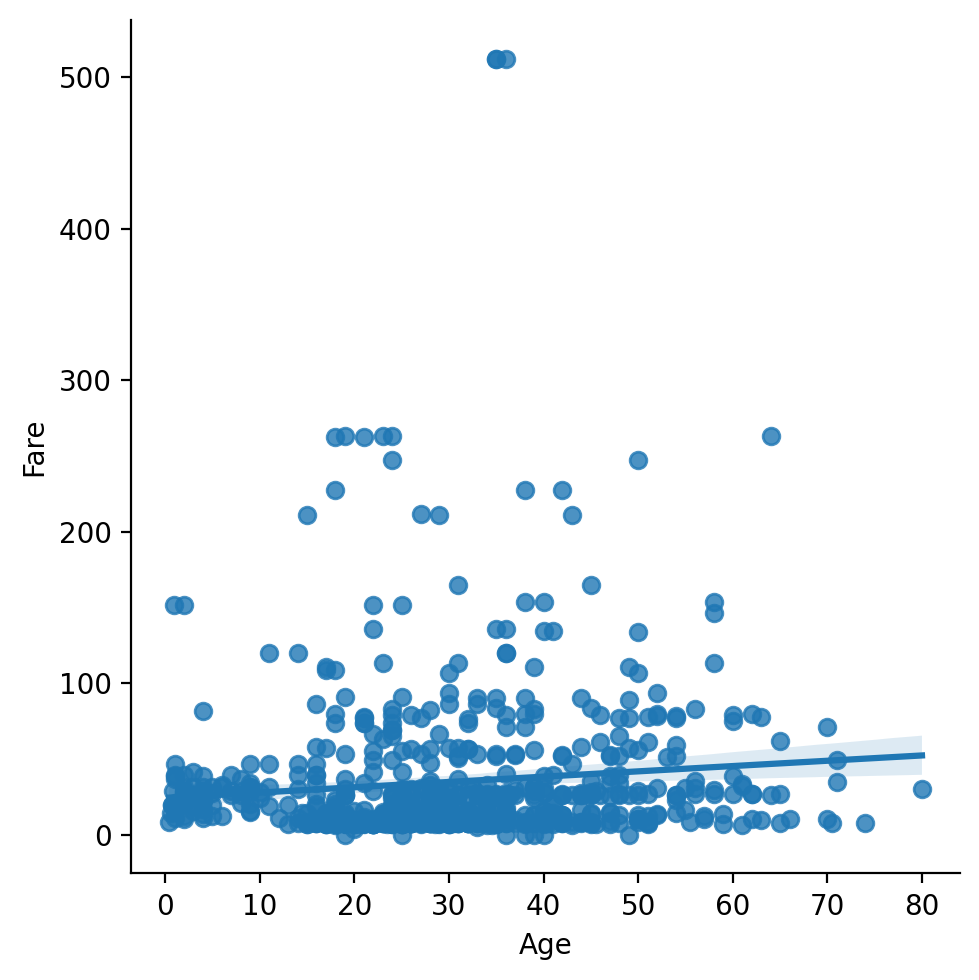

In [100]:
# 요금과 나이 관계 살펴보기
plt.scatter(data["Age"], data["Fare"], s=6)
plt.show()

sns.lmplot(x = 'Age', y = 'Fare', data = data)
plt.show()

### 4-11. Cabin
- 많은 결측치
- 결측치를 채울 방법 생각해보기

In [101]:
pd.DataFrame([i[0] for i in data[data.Cabin.isna()==False].Cabin]).value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
dtype: int64

In [102]:
data[data.Cabin.isna()==False][:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


### 4-12. Embarked
- C가 생존확률이 다른 항에 비해 더 높음
- S에서 유독 높은 사망률을 보임 
- S에서 솔로+3등석이 많이 탐

- 또한 독신의 경우 3등석을 많이 탐을 확인 할 수 있음

<Axes: xlabel='Embarked', ylabel='count'>

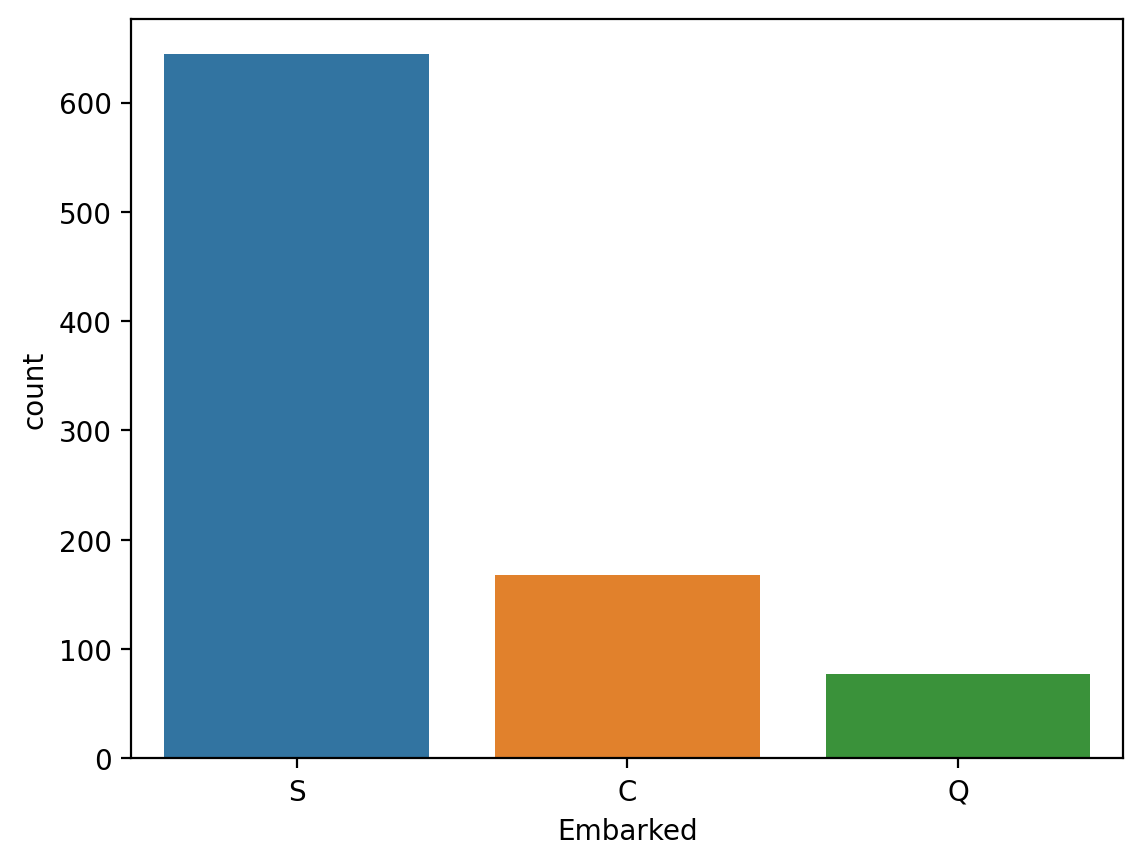

In [103]:
sns.countplot(x='Embarked',data=data)

<Axes: xlabel='Embarked', ylabel='count'>

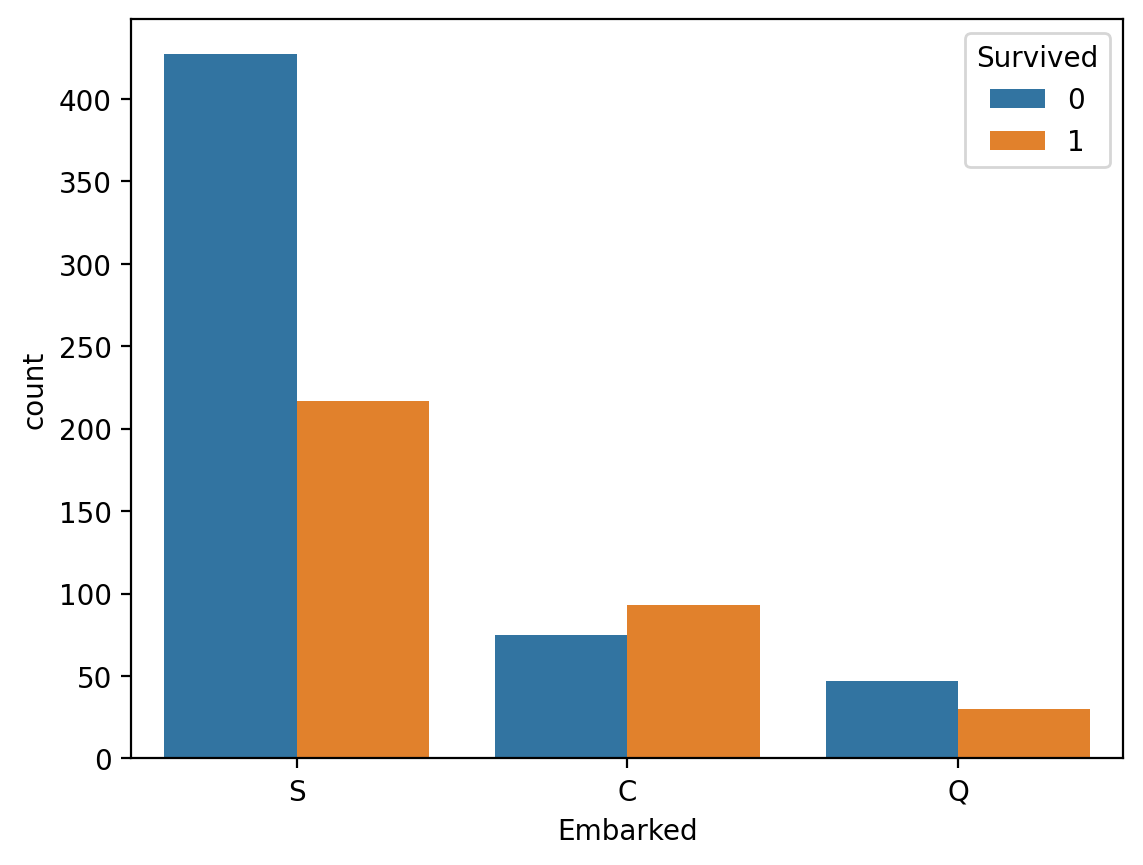

In [72]:
# S에서 유독 많은 사망자가 발생했음을 확인
sns.countplot(x='Embarked',hue='Survived',data=data)

<Axes: >

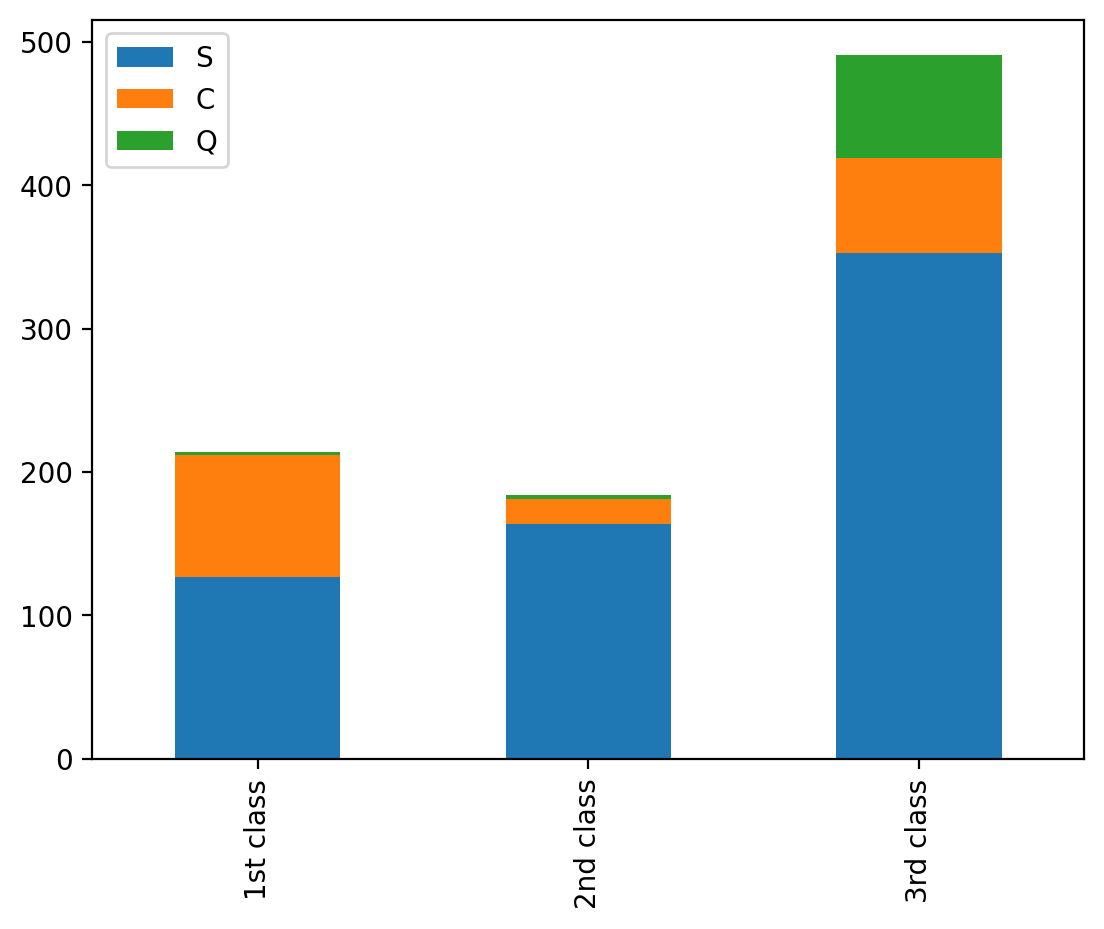

In [79]:
# 항구별 class 탑승자 확인
pclass1=data[data['Pclass']==1]['Embarked'].value_counts()
pclass2=data[data['Pclass']==2]['Embarked'].value_counts()
pclass3=data[data['Pclass']==3]['Embarked'].value_counts()

df=pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,)

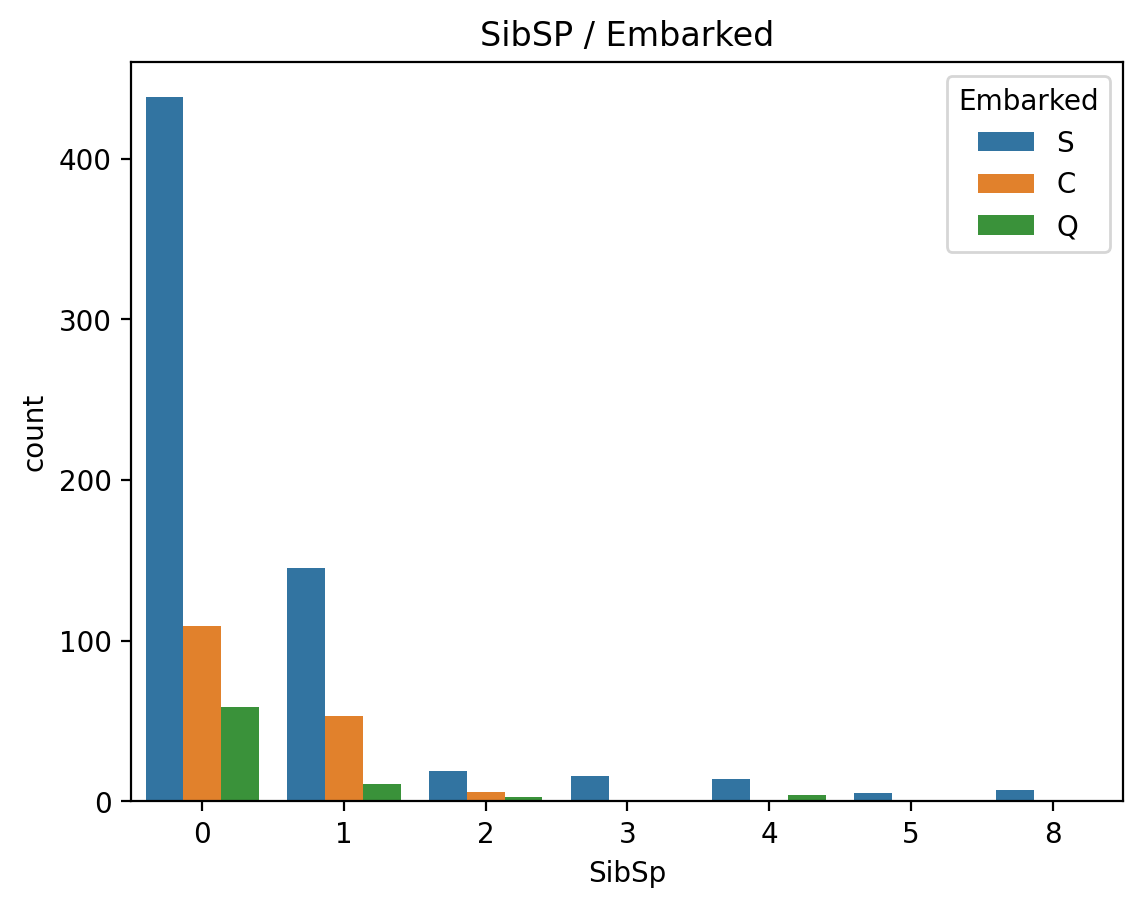

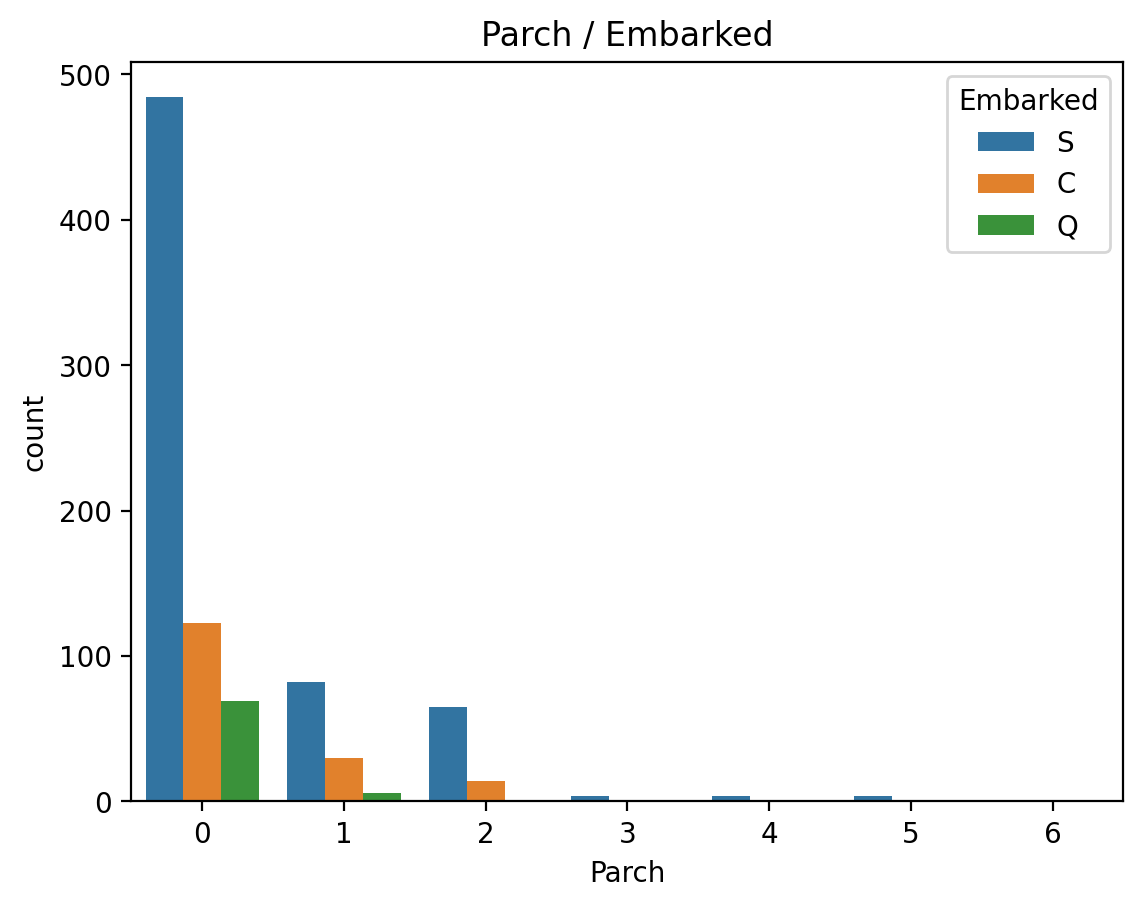

In [82]:
# 항구별 동승자 확인
sns.countplot(x='SibSp',hue='Embarked',data=data)
plt.title('SibSP / Embarked')
plt.show()

sns.countplot(x='Parch',hue='Embarked',data=data)
plt.title('Parch / Embarked')
plt.show()


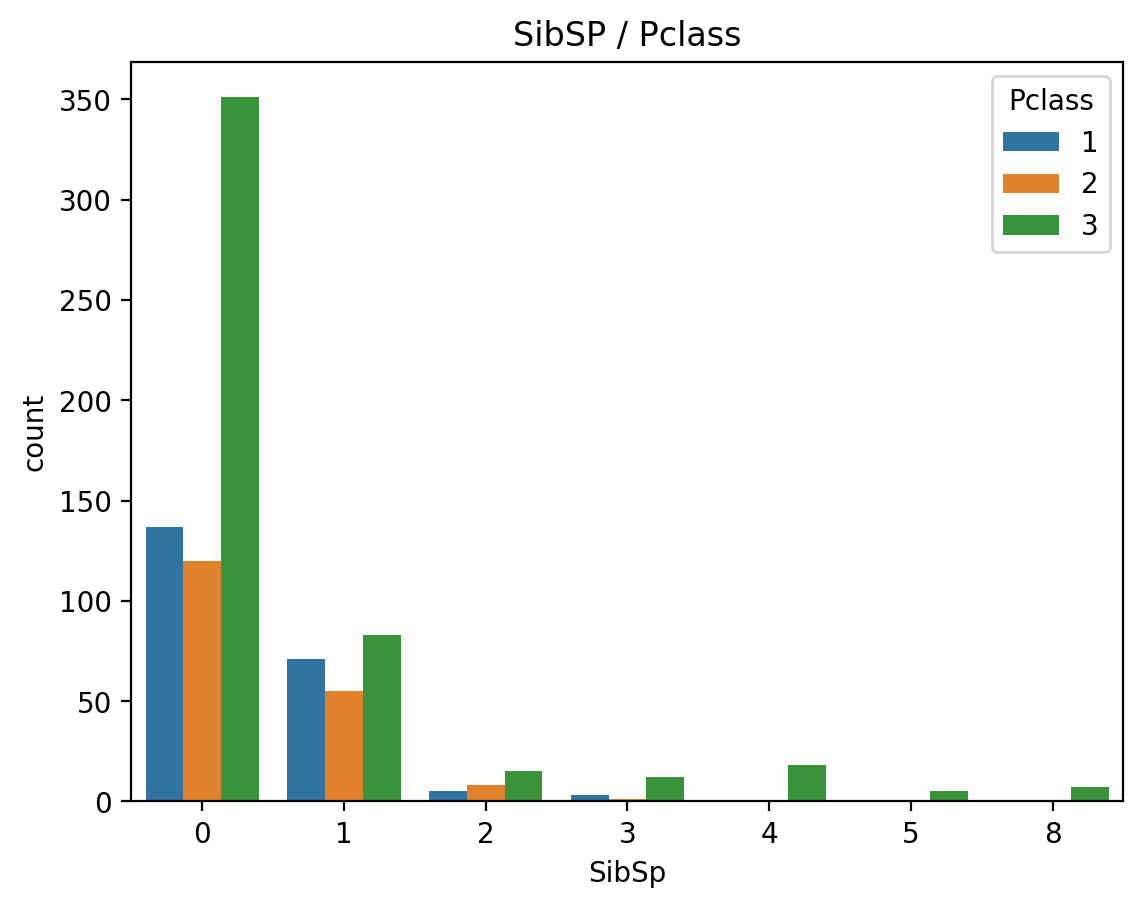

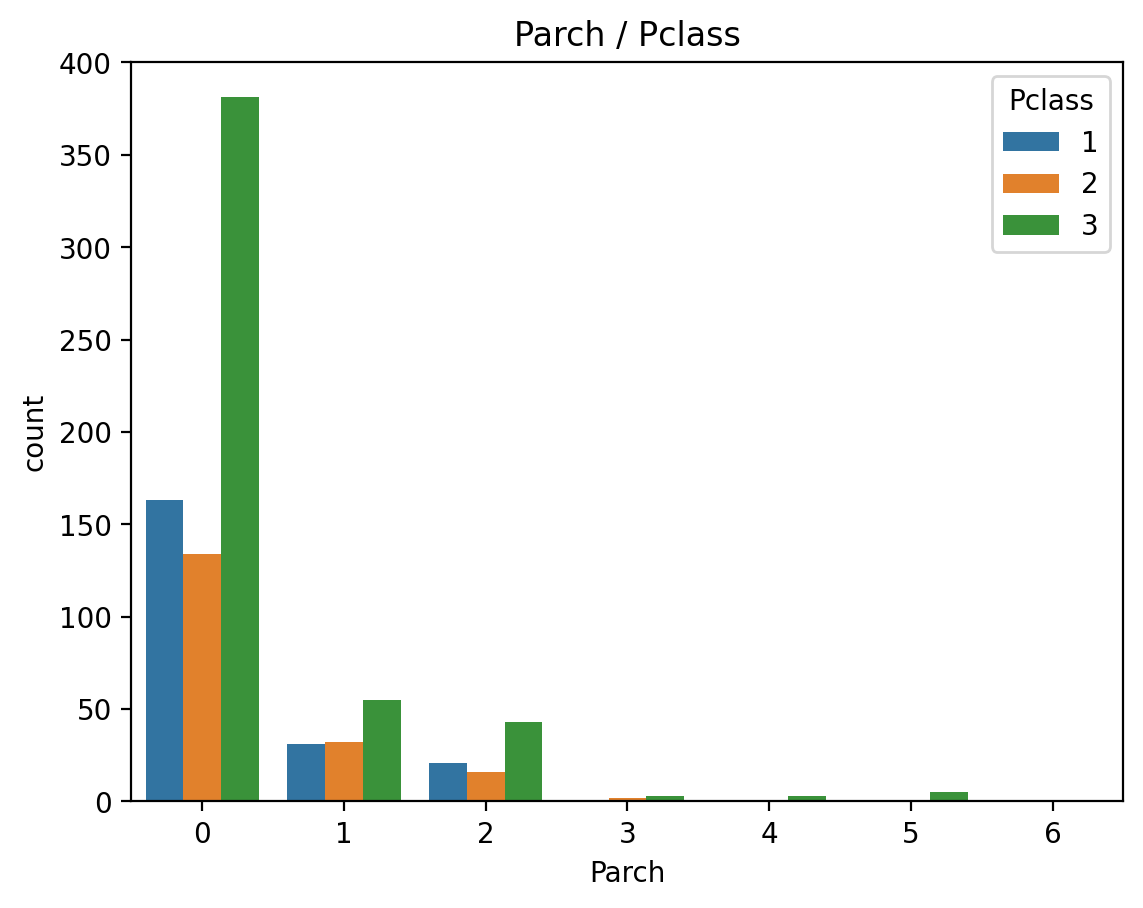

In [84]:
# 클래스별 동승자확인
sns.countplot(x='SibSp',hue='Pclass',data=data)
plt.title('SibSP / Pclass')
plt.show()

sns.countplot(x='Parch',hue='Pclass',data=data)
plt.title('Parch / Pclass')
plt.show()
